In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\User\Desktop\프로젝트\개인\instacart_feedback\민지\translated_reviews.csv")
df.head(2)

,name,rating,date,review,mentioned_products,review_length,리뷰(번역)
0,John,1.0,23-Apr-25,january 2025 present april 23 2025 instacart d...,milk,814,2025년 1월부터 2025년 4월 23일까지 인스타카트가 뉴저지 베이온의 스톱 앤...
1,Sophie,1.0,21-Mar-25,worst grocery delivery ordered groceries produ...,onion,793,"제일 최악의 식료품 배송 주문한 식료품 생산물을 포장한 봉투에 담아 상추, 셀러리,..."


In [3]:
df = df[['rating', '리뷰(번역)', 'mentioned_products']]
df.head(2)

,rating,리뷰(번역),mentioned_products
0,1.0,2025년 1월부터 2025년 4월 23일까지 인스타카트가 뉴저지 베이온의 스톱 앤...,milk
1,1.0,"제일 최악의 식료품 배송 주문한 식료품 생산물을 포장한 봉투에 담아 상추, 셀러리,...",onion


In [7]:
df = df.rename(columns={'리뷰(번역)': 'review'})
df.to_excel('review_trans.xlsx', index=False)

In [8]:
df_new = df.copy()

# 공백 기준 토큰화
df_new['tokens'] = df_new['review'].astype(str).str.split()
df_new.head(2)

,rating,review,mentioned_products,tokens
0,1.0,2025년 1월부터 2025년 4월 23일까지 인스타카트가 뉴저지 베이온의 스톱 앤...,milk,"[2025년, 1월부터, 2025년, 4월, 23일까지, 인스타카트가, 뉴저지, 베..."
1,1.0,"제일 최악의 식료품 배송 주문한 식료품 생산물을 포장한 봉투에 담아 상추, 셀러리,...",onion,"[제일, 최악의, 식료품, 배송, 주문한, 식료품, 생산물을, 포장한, 봉투에, 담..."


In [9]:
from collections import Counter

# 불용어 리스트
korean_stopwords = [
    '그리고', '하지만', '그래서', '그런데', '또한', '저는', '제가', '그건', '그게',
    '이건', '이게', '뭐', '좀', '거', '더', '이런', '저런', '있는', '없는', '했습니다', '합니다',
    '있습니다', '였다', '된다', '하게', '하면', '하다', '것', '같다', '때문', '에서는'
]

# 상위 키워드 추출 함수 정의
def extract_top_keywords_korean(tokens, top_n=10):
    filtered = [w for w in tokens if w not in korean_stopwords and len(w) > 1]
    top_words = [word for word, count in Counter(filtered).most_common(top_n)]
    return top_words

# 기존 데이터프레임에 적용
df_new['top_keywords'] = df_new['tokens'].apply(extract_top_keywords_korean)
df_new.head(3)

,rating,review,mentioned_products,tokens,top_keywords
0,1.0,2025년 1월부터 2025년 4월 23일까지 인스타카트가 뉴저지 베이온의 스톱 앤...,milk,"[2025년, 1월부터, 2025년, 4월, 23일까지, 인스타카트가, 뉴저지, 베...","[스톱, 샵에, 주문을, 2025년, 주소로, 음식, 3일, 1월부터, 4월, 23..."
1,1.0,"제일 최악의 식료품 배송 주문한 식료품 생산물을 포장한 봉투에 담아 상추, 셀러리,...",onion,"[제일, 최악의, 식료품, 배송, 주문한, 식료품, 생산물을, 포장한, 봉투에, 담...","[배송, 식료품, 봉투에, 환불에, 대해, 식료품을, 했지만, 제일, 최악의, 주문한]"
2,1.0,"주문한 물건들이 다양한 종류의 브랜드로 주문되었는데, 원래 주문한 것은 달지 않은 ...",milk,"[주문한, 물건들이, 다양한, 종류의, 브랜드로, 주문되었는데,, 원래, 주문한, ...","[주문한, 물건들이, 다양한, 종류의, 브랜드로, 주문되었는데,, 원래, 것은, 달..."


In [10]:
df_new['mentioned_products'] = df_new['mentioned_products'].apply(lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) else [])
df_new.head(2)

,rating,review,mentioned_products,tokens,top_keywords
0,1.0,2025년 1월부터 2025년 4월 23일까지 인스타카트가 뉴저지 베이온의 스톱 앤...,[milk],"[2025년, 1월부터, 2025년, 4월, 23일까지, 인스타카트가, 뉴저지, 베...","[스톱, 샵에, 주문을, 2025년, 주소로, 음식, 3일, 1월부터, 4월, 23..."
1,1.0,"제일 최악의 식료품 배송 주문한 식료품 생산물을 포장한 봉투에 담아 상추, 셀러리,...",[onion],"[제일, 최악의, 식료품, 배송, 주문한, 식료품, 생산물을, 포장한, 봉투에, 담...","[배송, 식료품, 봉투에, 환불에, 대해, 식료품을, 했지만, 제일, 최악의, 주문한]"


In [14]:
from sklearn.preprocessing import MultiLabelBinarizer

# MultiLabelBinarizer를 이용해 mentioned_products를 one-hot 인코딩
mlb = MultiLabelBinarizer()

# product_category 컬럼에 있는 리스트 값을 one-hot 인코딩
encoded_category = pd.DataFrame(mlb.fit_transform(df_new['mentioned_products']),
                                columns=mlb.classes_,
                                index=df_new.index)

# 결과 병합
df_onehot = pd.concat([df_new, encoded_category], axis=1)
df_onehot.head(2)

,rating,review,mentioned_products,tokens,top_keywords,,",",a,b,c,...,n,o,p,r,s,t,u,v,w,y
0,1.0,2025년 1월부터 2025년 4월 23일까지 인스타카트가 뉴저지 베이온의 스톱 앤...,milk,"[2025년, 1월부터, 2025년, 4월, 23일까지, 인스타카트가, 뉴저지, 베...","[스톱, 샵에, 주문을, 2025년, 주소로, 음식, 3일, 1월부터, 4월, 23...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,"제일 최악의 식료품 배송 주문한 식료품 생산물을 포장한 봉투에 담아 상추, 셀러리,...",onion,"[제일, 최악의, 식료품, 배송, 주문한, 식료품, 생산물을, 포장한, 봉투에, 담...","[배송, 식료품, 봉투에, 환불에, 대해, 식료품을, 했지만, 제일, 최악의, 주문한]",0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


- 여기서 abcd,.... 이게 뭘 의미하는지 모르겠음

------------민지 -----------

In [11]:
df_new['mentioned_products'].head(2)


0     [milk]
1    [onion]
Name: mentioned_products, dtype: object

- 이 상태에서 MultiLabelBinarizer를 사용하면 "milk"는 m, i, l, k 각각을 라벨로 잘못 인식합니다 → 그래서 a, b, c, ... 컬럼이 생긴 거예요.

- 내가 원하는 상태 : 리스트 형태 

| 인덱스 | 값           | 자료형    |
| --- | ----------- | ------ |
| 0   | `['milk']`  | `list` |
| 1   | `['onion']` | `list` |


In [12]:
# 예: 제대로 ',' 기준으로만 나누도록 다시 처리
df_new['mentioned_products'] = df_new['mentioned_products'].apply(
    lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) and ',' in x else [x] if isinstance(x, str) else []
)


해결 방법: 문자열 → 리스트로 바꾸기

In [13]:
df_new['mentioned_products'] = df_new['mentioned_products'].apply(
    lambda x: [x.strip()] if isinstance(x, str) else []
)


In [14]:
df_new['mentioned_products'].head(2)

0    []
1    []
Name: mentioned_products, dtype: object

In [15]:
# 문자열을 리스트로 변환
df_new['mentioned_products'] = df['mentioned_products'].apply(
    lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) and x.strip() != '' else []
)


In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

encoded_category = pd.DataFrame(
    mlb.fit_transform(df_new['mentioned_products']),
    columns=mlb.classes_,
    index=df_new.index
)

df_onehot = pd.concat([df_new, encoded_category], axis=1)
df_onehot.head(2)



,rating,review,mentioned_products,tokens,top_keywords,avocados,baby spinach,banana,bananas,blueberrie,blueberries,lemon,lemons,milk,onion,onions,raspberries,spinach,strawberries,strawberry
0,1.0,2025년 1월부터 2025년 4월 23일까지 인스타카트가 뉴저지 베이온의 스톱 앤...,[milk],"[2025년, 1월부터, 2025년, 4월, 23일까지, 인스타카트가, 뉴저지, 베...","[스톱, 샵에, 주문을, 2025년, 주소로, 음식, 3일, 1월부터, 4월, 23...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1.0,"제일 최악의 식료품 배송 주문한 식료품 생산물을 포장한 봉투에 담아 상추, 셀러리,...",[onion],"[제일, 최악의, 식료품, 배송, 주문한, 식료품, 생산물을, 포장한, 봉투에, 담...","[배송, 식료품, 봉투에, 환불에, 대해, 식료품을, 했지만, 제일, 최악의, 주문한]",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


 1. 제품별 감성 분석

In [19]:
from konlpy.tag import Okt

# 예시 감성사전 (KNU 기반으로 간단화한 것)
sentiment_dict = {
    '좋다': 1, '훌륭하다': 2, '최악': -2, '불만': -1, '신선하다': 1,
    '빠르다': 1, '상했다': -2, '느리다': -1, '불편하다': -2
}

okt = Okt()

def analyze_sentiment(text):
    tokens = okt.morphs(str(text))
    score = sum(sentiment_dict.get(word, 0) for word in tokens)
    return score

df_onehot['sentiment'] = df_onehot['review'].apply(analyze_sentiment)


In [20]:
product_sentiment = {
    col: df_onehot[df_onehot[col] == 1]['sentiment'].mean()
    for col in mlb.classes_
}


In [21]:
product_sentiment

{'avocados': 0.0,
 'baby spinach': 0.0,
 'banana': -0.4444444444444444,
 'bananas': -0.2857142857142857,
 'blueberrie': 0.0,
 'blueberries': 0.0,
 'lemon': -2.0,
 'lemons': -2.0,
 'milk': -0.18518518518518517,
 'onion': -1.2,
 'onions': -1.0,
 'raspberries': 0.0,
 'spinach': 0.0,
 'strawberries': -0.3333333333333333,
 'strawberry': -0.25}

In [22]:
import pandas as pd

df_sentiment = pd.DataFrame.from_dict(product_sentiment, orient='index', columns=['sentiment_score']).reset_index()
df_sentiment.columns = ['product', 'sentiment_score']


In [23]:
df_sentiment

,product,sentiment_score
0,avocados,0.000000
1,baby spinach,0.000000
2,banana,-0.444444
3,bananas,-0.285714
4,blueberrie,0.000000
5,blueberries,0.000000
6,lemon,-2.000000
7,lemons,-2.000000
8,milk,-0.185185
9,onion,-1.200000


불만 리뷰만 필터링

In [24]:
negative_reviews = df_onehot[df_onehot['sentiment'] < -0.3]

제품별 불만 리뷰 수 카운트

In [25]:
product_complaints = {
    col: negative_reviews[negative_reviews[col] == 1].shape[0]
    for col in mlb.classes_
}

df_complaints = pd.DataFrame.from_dict(product_complaints, orient='index', columns=['negative_count']).reset_index()
df_complaints.columns = ['product', 'negative_count']


불만 리뷰 키워드 정리

In [26]:
from collections import Counter

complaint_keywords = {}

for col in mlb.classes_:
    keyword_lists = negative_reviews[negative_reviews[col] == 1]['top_keywords'].tolist()
    keywords = sum(keyword_lists, [])  # 빈 리스트 처리 포함
    if isinstance(keywords, list):
        top_complaints = [word for word, _ in Counter(keywords).most_common(10)]
    else:
        top_complaints = []
    complaint_keywords[col] = top_complaints

df_keywords = pd.DataFrame([
    {'product': k, 'complaint_keywords': v} for k, v in complaint_keywords.items()
])


In [27]:
df_final = df_sentiment.merge(df_complaints, on='product', how='left') \
                       .merge(df_keywords, on='product', how='left')

# 숫자는 fillna 가능
df_final['negative_count'] = df_final['negative_count'].fillna(0).astype(int)

# 리스트 컬럼은 따로 처리
df_final['complaint_keywords'] = df_final['complaint_keywords'].apply(lambda x: x if isinstance(x, list) else [])


In [92]:
df_final

,product,sentiment_score,negative_count,complaint_keywords
0,avocados,0.000000,0,[]
1,baby spinach,0.000000,0,[]
2,banana,-0.444444,2,"[문제가, 주문했지만, 식료품을, 받았고,, 불만에, 대한, 응답이, 없었습니다.,..."
3,bananas,-0.285714,1,"[문제가, 주문했지만, 식료품을, 받았고,, 불만에, 대한, 응답이, 없었습니다.,..."
4,blueberrie,0.000000,0,[]
5,blueberries,0.000000,0,[]
6,lemon,-2.000000,1,"[보내는, 불만을, 서비스는, 괜찮았지만, 환불된, 상태의, 상품들이, 왔어요., ..."
7,lemons,-2.000000,1,"[보내는, 불만을, 서비스는, 괜찮았지만, 환불된, 상태의, 상품들이, 왔어요., ..."
8,milk,-0.185185,4,"[스톱, 샵에, 주문을, 2025년, 주소로, 음식, 4월, 3일, 1월부터, 23..."
9,onion,-1.200000,3,"[주문한, 배송, 식료품, 봉투에, 환불에, 대해, 식료품을, 했지만, 제일, 최악의]"


- 흐름 파악하기 어려움 -> 원문을 같이 봐볼까?

In [28]:
def get_review_snippets(df, product, keywords, max_snippets=3):
    reviews = df[df[product] == 1]['review'].dropna()
    snippets = []
    for review in reviews:
        if any(kw in review for kw in keywords):
            snippets.append(review)
        if len(snippets) >= max_snippets:
            break
    return snippets

# 적용 예시
example = get_review_snippets(df_onehot, 'banana', ['문제가', '주문했지만'])
for i, s in enumerate(example, 1):
    print(f"[{i}] {s}")


[1] 식료품을 주문했는데 문제가 4가지 발생했습니다. 주문을 받았지만 인스타카트에 연락하여 문제를 해결했습니다. 다음과 같은 문제가 있었습니다. 1. 2kg 토마토를 주문했지만 0.76kg만 받았고, 불만에 대한 응답이 없었습니다. 2. 0.35kg 생강을 주문했지만 0.17kg만 받았고, 불만에 대한 응답이 없었습니다. 3. 유기농 바나나를 주문했지만 일반 바나나가 배달되었고, 계정에 크레딧을 약속했지만 이행되지 않았습니다. 4. 추가 주문한 품목이 배달되었지만 문제가 해결되지 않았고, 총 8개의 추가 품목이 청구되었습니다. 이러한 문제로 인해 식료품을 구매하는 것이 어려웠습니다.
[2] 인스타카트 멤버십을 결제해야 한다는 아이디어가 마음에 들지 않았습니다. 남편이 더 이상 운전을 할 수 없어 알디 가게에 가서 장을 살 수 없을 때, 선택의 여지가 없었습니다. 정기적으로 필요한 물품을 선택할 수 있는 것은 좋았지만, 배송은 완벽했지만 문제가 있었습니다. 의도적으로 밝은 녹색 바나나를 산 쇼퍼들이 있었고, 멤버십이 두 번 일어났을 때 각기 다른 쇼퍼가 주문한 신선한 블루베리가 두 번 도착했을 때 줄기에 곰팡이가 났습니다. 쇼퍼 노트에 완전히 익은 과일을 선택하라는 표시가 무시되었고, 우유, 빵 등의 장바구니를 선택했던 아이템들은 장기간 유통기한이 있는 것을 기대했지만 쇼퍼 노트를 추가할 수 있었으면 더 좋았을 것입니다. 가장 큰 문제는 해동된 후 다시 얼린 봉지에 든 허니 바비큐 치킨 날개를 발견했을 때 발생했습니다. 개봉 후 1주일이 지난 후 준비가 된 것이 아니었고, 남편이 고객 서비스에 전화하여 상황을 설명했을 때, 대리인이 40분간 대기하라고 했지만 그 후에도 신경 쓰지 않는 것처럼 보
[3] 인스타카트를 사용한 경험은 좋았지만, 문제가 많았습니다. 매년 결제하는 구독비를 99달러 지불했는데 배송비를 청구받지 않았습니다. 그러나 상품들이 과도하게 비싼 것을 주의해야 했습니다. 예를 들어, 토마토를 구매하려고 했는데 포도 토마토를 선택하고 카트에 넣었을

In [29]:
import pandas as pd
import re

# 제품 키워드와 불만 키워드 정의
product_keywords = ['바나나', '토마토', '생강', '우유', '치킨', '블루베리', '레몬', '양파', '시금치', '아보카도']
complaint_keywords = ['문제', '환불', '잘못', '부족', '파손', '곰팡이', '응답이', '불만', '대응', '기대', '배송', '지연']


리뷰에서 문장 단위로 분할하고, 조건에 맞는 문장만 추출

In [30]:
def extract_complaint_info(review):
    sentences = re.split(r'[.!?]', str(review))  # 문장 나누기
    results = []

    for sentence in sentences:
        sentence = sentence.strip()
        if not sentence:
            continue
        found_products = [prod for prod in product_keywords if prod in sentence]
        found_issues = [issue for issue in complaint_keywords if issue in sentence]
        
        if found_products and found_issues:
            results.append({
                'product': ', '.join(found_products),
                'issue': ', '.join(found_issues),
                'example': sentence
            })

    return results


전체 리뷰에 적용해서 표로 만들기

In [31]:
complaint_summary = []

for idx, row in df_onehot.iterrows():
    extracted = extract_complaint_info(row['review'])
    complaint_summary.extend(extracted)

# 데이터프레임으로 정리
df_complaint_summary = pd.DataFrame(complaint_summary)


In [43]:
df_complaint_summary 

,product,issue,example
0,우유,유통기한,"주문에는 유통기한이 있는 우유, 냉장고에 보관되는 주스, 냉동 식품, 콜드 컷, 로..."
1,우유,유통기한,"쇼퍼 노트에 완전히 익은 과일을 선택하라는 표시가 무시되었고, 우유, 빵 등의 장바..."
2,"바나나, 레몬",상처 입은,"상품에는 상처 입은 바나나와 사용할 수 없는 레몬, 건조된 껍질 대신 오렌지 주스가..."


- 내가 한게 불만 유형별 요약 표인데 , 이 결과가 마음에 듬
-> 제품별 리뷰를 일부 확인하고 불만 키워드 확장시켜서 구체화시키기

1. 상품별 불만 리뷰 5개 추출 코드

In [32]:
sampled_reviews = []

for product in mlb.classes_:
    product_reviews = negative_reviews[negative_reviews[product] == 1]
    
    # 해당 상품의 불만 리뷰에서 최대 5개 샘플 추출
    sampled = product_reviews[['review']].dropna().sample(n=min(5, len(product_reviews)), random_state=42).copy()
    sampled['product'] = product
    sampled_reviews.append(sampled)

# 통합
df_sampled_reviews = pd.concat(sampled_reviews).reset_index(drop=True)


In [33]:
# 특정 상품에 대한 불만 리뷰 예시 보기
df_sampled_reviews[df_sampled_reviews['product'] == 'banana'][['review']]


,review
0,서비스는 괜찮았지만 환불된 상태의 상품들이 왔어요. 상품에는 상처 입은 바나나와 사...
1,식료품을 주문했는데 문제가 4가지 발생했습니다. 주문을 받았지만 인스타카트에 연락하...


In [34]:
# 제품명 영어 → 한국어 매핑 딕셔너리
product_name_ko = {
    'avocados': '아보카도',
    'baby spinach': '시금치',
    'banana': '바나나',
    'bananas': '바나나',
    'blueberrie': '블루베리',
    'blueberries': '블루베리',
    'lemon': '레몬',
    'lemons': '레몬',
    'milk': '우유',
    'onion': '양파',
    'onions': '양파',
    'raspberries': '라즈베리',
    'spinach': '시금치',
    'strawberries': '딸기',
    'strawberry': '딸기'
}


In [35]:
df_sampled_reviews['product_ko'] = df_sampled_reviews['product'].map(product_name_ko)


In [36]:
# 예시: '우유'에 해당하는 불만 리뷰 출력
df_sampled_reviews[df_sampled_reviews['product_ko'] == '우유']


,review,product,product_ko
5,인스타카트 고객 2020 전반적으로 좋은 경험을 했습니다. 팁을 25-30% 정도 ...,milk,우유
6,2025년 4월 24일에 작성된 4개의 리뷰를 보고 가능한 경우 2025년 1월부터...,milk,우유
7,2025년 1월부터 2025년 4월 23일까지 인스타카트가 뉴저지 베이온의 스톱 앤...,milk,우유
8,인스타카트 배송 퍼블릭스에서 나쁜 경험을 했습니다. 냉동된 내용물이 녹아 60도까지...,milk,우유


-> 전부 확인했고 이걸 기반으로 불만 키워드 확장시킬거

In [37]:
import pandas as pd
import re

# 제품 키워드 (한글 기준)
product_keywords = ['바나나', '토마토', '생강', '우유', '블루베리', '레몬', '양파', '시금치', '아보카도', '딸기']

# 제품별 불만 키워드 확장 사전
expanded_complaints = ['냉동 해동', '상품 온도', '유통기한', '배송 지연', '보관 문제', '냉장 불량'
    ,'리뷰 삭제', '직원 태도', '불만 대응', 'CS 응대', '고객 의견 무시', '서비스 불신'
    ,'상품 손상', '상처 입은', '과일 불량', '환불 처리', '포장 문제', '상품 불량'
    ,'중량 부족', '대체 상품', '크레딧 미지급', '추가 청구', '오배송', '환불 누락', '신뢰 저하'
]

# 모든 불만 키워드 하나로 통합
complaint_keywords = expanded_complaints

# 리뷰에서 제품명과 불만 키워드를 추출
def extract_complaint_info(review):
    sentences = re.split(r'[.!?]', str(review))  # 문장 분리
    results = []

    for sentence in sentences:
        sentence = sentence.strip()
        if not sentence:
            continue
        found_products = [prod for prod in product_keywords if prod in sentence]
        found_issues = [issue for issue in complaint_keywords if issue in sentence]
        
        if found_products and found_issues:
            results.append({
                'product': ', '.join(found_products),
                'issue': ', '.join(found_issues),
                'example': sentence
            })

    return results

# 전체 리뷰에 적용
complaint_summary = []

for idx, row in df_onehot.iterrows():
    extracted = extract_complaint_info(row['review'])
    complaint_summary.extend(extracted)

# 데이터프레임으로 정리
df_complaint_summary = pd.DataFrame(complaint_summary)


In [38]:
def extract_complaint_info_simple(review):
    sentences = re.split(r'[.!?]', str(review))
    results = []

    for sentence in sentences:
        sentence = sentence.strip()
        if not sentence:
            continue
        found_issues = [issue for issue in complaint_keywords if issue in sentence]
        
        if found_issues:
            results.append({
                'issue': ', '.join(found_issues),
                'example': sentence
            })

    return results

# 실행
complaint_summary_simple = []

for idx, row in df_onehot.iterrows():
    extracted = extract_complaint_info_simple(row['review'])
    complaint_summary_simple.extend(extracted)

df_complaint_summary_simple = pd.DataFrame(complaint_summary_simple)


In [39]:
df_complaint_summary.to_csv('df_complaint_summary.csv',encoding='utf-8-sig',index=False)

 추가로: 상위 이슈 정리, 제품별 이슈 빈도 정리

In [40]:
df_new['mentioned_products'].head(2)


0     [milk]
1    [onion]
Name: mentioned_products, dtype: object

 2. 제품 간 연관성 분석 (연관규칙 분석)

In [41]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1. 제품 원핫 인코딩만 추출
product_onehot = df_onehot[mlb.classes_]

# 2. 연관 규칙 분석
frequent_itemsets = apriori(product_onehot, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


c:\Users\User\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [84]:
frequent_itemsets

,support,itemsets
0,0.022222,(avocados)
1,0.022222,(baby spinach)
2,0.200000,(banana)
3,0.155556,(bananas)
4,0.066667,(blueberrie)
...,...,...
57,0.022222,"(banana, bananas, blueberries, milk)"
58,0.022222,"(banana, bananas, strawberries, milk)"
59,0.022222,"(banana, blueberries, blueberrie, milk)"
60,0.022222,"(blueberries, bananas, blueberrie, milk)"


식품별로 어떤 키워드가 자주 등장하는지 분석하려는 목적

In [24]:
result = []  # 최종 데이터를 담을 리스트

cols = ['avocados', 'baby spinach', 'banana', 'bananas', 'blueberrie',
        'blueberries', 'lemon', 'lemons', 'milk', 'onion', 'onions',
        'raspberries', 'spinach', 'strawberries', 'strawberry']

for col in cols:
    keywords = df_onehot[df_onehot[col] == 1]['top_keywords'].sum()
    result.append({'food': col, 'keywords': keywords})

df_fin = pd.DataFrame(result)
df_fin.head(3) 

,food,keywords
0,avocados,"[주문을, 고기를, 식료품을, 필요합니다., 오늘, 다른, 2파운드, 단위로, 정확..."
1,baby spinach,"[동안, 식료품을, 그러나, 것을, 온라인, 서비스는, 제품의, 돈을, 5년, 팬데믹을]"
2,banana,"[문제가, 주문했지만, 식료품을, 받았고,, 불만에, 대한, 응답이, 없었습니다.,..."


유사 식품을 하나의 ‘카테고리’로 묶고,
그 카테고리에서 자주 등장한 키워드(상위 10개)를 추출하는 것

이 작업을 통해,

불필요하게 쪼개진 식품명(예: banana, bananas)을 하나로 묶고

보다 의미 있는 분석 단위로 키워드를 볼 수 있게 돼요.



In [26]:
from collections import defaultdict, Counter

# 카테고리 통합 기준 설정
category_map = {
    'banana': 'banana',
    'bananas': 'banana',
    'blueberrie': 'berries',
    'blueberries': 'berries',
    'strawberry': 'berries',
    'strawberries': 'berries',
    'raspberry': 'berries',
    'raspberries': 'berries',
    'avocados': 'avocado',
    'lemon': 'lemon',
    'lemons': 'lemon',
    'spinach': 'spinach',
    'baby spinach': 'spinach',
    'onion': 'onion',
    'onions': 'onion',
    'milk': 'milk'
}

# 카테고리별 키워드 모으기
grouped_keywords = defaultdict(list)

for _, row in df_fin.iterrows():
    food = row['food']
    keywords = eval(row['keywords']) if isinstance(row['keywords'], str) else row['keywords']
    category = category_map.get(food)
    if category:
        grouped_keywords[category].extend(keywords)

# 카테고리별 상위 키워드 10개 추출
category_top_keywords = {
    cat: [kw for kw, _ in Counter(words).most_common(10)]
    for cat, words in grouped_keywords.items()
}

# 데이터프레임으로 정리
df_result = pd.DataFrame([
    {'category': cat, 'top_keywords': kws} for cat, kws in category_top_keywords.items()
])
df_result.head(5)

,category,top_keywords
0,avocado,"[주문을, 고기를, 식료품을, 필요합니다., 오늘, 다른, 2파운드, 단위로, 정확..."
1,spinach,"[동안, 서비스는, 식료품을, 그러나, 것을, 온라인, 제품의, 돈을, 5년, 팬데믹을]"
2,banana,"[주문을, 서비스를, 식료품을, 계속, 인스타카트, 다른, 문제가, 주문했지만, 받..."
3,berries,"[주문한, 문제가, 인스타카트, 계정을, 했습니다., 주문을, 있었습니다., 주지,..."
4,lemon,"[보내는, 불만을, 서비스는, 괜찮았지만, 환불된, 상태의, 상품들이, 왔어요., ..."


-----------민지------------

- 위에 코드의 결과 요약 
“이 식품이 언급된 리뷰에서는 이런 단어들이 자주 등장했다”

예:

banana 관련 리뷰에서는 주문을, 문제가, 받지, 서비스를 같은 키워드가 자주 등장했다.

→ 배송 문제, 주문 누락, 고객 서비스 이슈가 많았을 수도 있음이라는 간접적인 해석 가능

- 왜 나는 이 결과를 보고 이해가 잘안됐을까? 

| 이유                            | 설명                                               |
| ----------------------------- | ------------------------------------------------ |
| **1. 키워드들이 연결이 안 돼 보여요**      | 단어들만 있어도 문맥이 없어서 “이게 무슨 상황이지?” 느낌                |
| **2. 같은 키워드가 반복되거나 모호해요**     | `주문을`, `계정을`, `서비스는` 같은 단어는 **맥락 없이 보면 의미가 약해요** |
| **3. '무엇에 대한 키워드인지' 보이지 않아요** | 예: 'banana' 키워드 중 `계정을`, `받지`는 왜 나왔는지 알 수 없음     |


1. 키워드 빈도 수 함께 보기

In [27]:
from collections import Counter

for cat, words in grouped_keywords.items():
    print(f"[{cat}]")
    for word, count in Counter(words).most_common(10):
        print(f"  {word}: {count}")
    print()


[avocado]
  주문을: 1
  고기를: 1
  식료품을: 1
  필요합니다.: 1
  오늘: 1
  다른: 1
  2파운드: 1
  단위로: 1
  정확히: 1
  2파운드의: 1

[spinach]
  동안: 3
  서비스는: 3
  식료품을: 2
  그러나: 2
  것을: 2
  온라인: 2
  제품의: 2
  돈을: 2
  5년: 2
  팬데믹을: 2

[banana]
  주문을: 6
  서비스를: 5
  식료품을: 4
  계속: 4
  인스타카트: 4
  다른: 4
  문제가: 2
  주문했지만: 2
  받았고,: 2
  불만에: 2

[berries]
  주문한: 6
  문제가: 5
  인스타카트: 4
  계정을: 3
  했습니다.: 3
  주문을: 3
  있었습니다.: 2
  주지: 2
  물품이: 2
  빠져: 2

[lemon]
  보내는: 2
  불만을: 2
  서비스는: 2
  괜찮았지만: 2
  환불된: 2
  상태의: 2
  상품들이: 2
  왔어요.: 2
  상품에는: 2
  상처: 2

[milk]
  주문을: 7
  고객: 5
  주문한: 4
  것을: 4
  했습니다.: 4
  인스타카트: 4
  주문이: 3
  환불을: 3
  쇼핑을: 3
  계정을: 3

[onion]
  주문: 4
  접수: 4
  숨겨진: 4
  협박을: 4
  주문한: 3
  옵션을: 2
  없었어요.: 2
  많은: 2
  없다고: 2
  대체품을: 2



키워드가 잘못 뽑히고 있다는 느낌이 들어서 
1. 전처리를 다시 해볼예정 

In [37]:
# 기존 리스트에 추가할 보완 키워드들
additional_stopwords = [
     '필요합니다', '있었습니다', '있습니다',
     '그러나', '오늘', '동안', '계속', '또는', '정확히',
    '다른', '했지만', '다시', '말씀드리겠습니다',
    '받지', '그냥', '하고', '해서', '하였고', '정도', '이후', '이전', '정확히', '문제', '사용했어요',
    '전혀', '같습니다', '같아요'
]

korean_stopwords += additional_stopwords


In [38]:
korean_stopwords = list(set(korean_stopwords))

2. 조사와 어미 제거

In [39]:
from konlpy.tag import Okt
okt = Okt()

def extract_keywords_with_okt(text, top_n=10):
    tokens = okt.nouns(text)
    filtered = [w for w in tokens if w not in korean_stopwords and len(w) > 1]
    return [word for word, count in Counter(filtered).most_common(top_n)]


- 키워드 정제 후 결과 확인

In [40]:
df_new['top_keywords'].head(5)

0    [스톱, 샵에, 주문을, 2025년, 주소로, 음식, 3일, 1월부터, 4월, 23...
1     [배송, 식료품, 봉투에, 환불에, 대해, 식료품을, 했지만, 제일, 최악의, 주문한]
2    [주문한, 물건들이, 다양한, 종류의, 브랜드로, 주문되었는데,, 원래, 것은, 달...
3    [정도, 물품이, 주문이, 주면, 환불을, 받을, 물품을, 같습니다., 않았습니다....
4    [쇼핑을, 딜론스가, 3시, 배송을, 제안했습니다., 다행히, 저녁에, 주문을, 현...
Name: top_keywords, dtype: object

- 딜론스가 뭔지 찾아보기 

In [41]:
# 인덱스 0번의 전체 키워드 리스트 출력
print(df_new.loc[0, 'top_keywords'])

['스톱', '샵에', '주문을', '2025년', '주소로', '음식', '3일', '1월부터', '4월', '23일까지']


In [42]:
for i in range(5):
    print(f"[{i}] {df_new.loc[i, 'top_keywords']}")


[0] ['스톱', '샵에', '주문을', '2025년', '주소로', '음식', '3일', '1월부터', '4월', '23일까지']
[1] ['배송', '식료품', '봉투에', '환불에', '대해', '식료품을', '했지만', '제일', '최악의', '주문한']
[2] ['주문한', '물건들이', '다양한', '종류의', '브랜드로', '주문되었는데,', '원래', '것은', '달지', '않은']
[3] ['정도', '물품이', '주문이', '주면', '환불을', '받을', '물품을', '같습니다.', '않았습니다.', '크레딧을']
[4] ['쇼핑을', '딜론스가', '3시', '배송을', '제안했습니다.', '다행히', '저녁에', '주문을', '현지', '01분부터']


제품별로 차별성 있는 단어만 추출

In [44]:
df_onehot  # 각 리뷰가 어떤 제품을 언급했는지 원핫 인코딩 되어 있어야 함
df_onehot['top_keywords']  # 각 리뷰에서 추출된 키워드 리스트가 들어 있음



0     [스톱, 샵에, 주문을, 2025년, 주소로, 음식, 3일, 1월부터, 4월, 23...
1      [배송, 식료품, 봉투에, 환불에, 대해, 식료품을, 했지만, 제일, 최악의, 주문한]
2     [주문한, 물건들이, 다양한, 종류의, 브랜드로, 주문되었는데,, 원래, 것은, 달...
3     [정도, 물품이, 주문이, 주면, 환불을, 받을, 물품을, 같습니다., 않았습니다....
4     [쇼핑을, 딜론스가, 3시, 배송을, 제안했습니다., 다행히, 저녁에, 주문을, 현...
5      [초콜릿, 7oz, 다크, 러셀, 스토버, 부홍이를, 대체품을, 원치, 대신, 환불을]
6       [동안, 계정을, 적절한, 냉동, 이용하는, 45년, 존속해, 카트가, 4년, 전에]
7     [문제가, 주문했지만, 식료품을, 받았고,, 불만에, 대한, 응답이, 없었습니다.,...
8     [크레딧을, 가격을, 깃발, 과도하게, 높은, 식품을, 우유가, 가방을, 문제가, ...
9     [것을, 물건을, 주문을, 아들이, 갔다가, 인스타카트에, 알게, 되었습니다., 취...
10    [죄송합니다., 문제를, 계속, 잘못된, 주문이, 있습니다., 아닙니다., 10일이...
11    [팁을, 식료품을, 주문했는데,, 주문했는데, 것을, 없었습니다., 오크라를, 선택...
12    [잘못된, 받았다., 받았는데,, 제품을, 환불을, 날씨가, 90도인, 날에, 장을...
13    [주문한, 옵션을, 없었어요., 많은, 없다고, 대체품을, 치킨, 것들을, 식료품점...
14    [주문한, 있었습니다., 주지, 물품이, 빠져, 계정을, 한다고, 했습니다., 인스...
15    [인스타카트를, 물건을, 최근, 통해, 배달, 쇼핑을, 시작했는데,, 주문한, 것과...
16     [계속해서, 주문, 주문한, 문제가, 문제를, 계정을, 문제, 정보를, 특정, 품질의]
17    [전화로, 동안, 오늘밤은, 인스타카트에, 마지막으로, 기회를, 다섯, 번째

 2. 차별 키워드 추출 방법

Step 1.  제품별 키워드 수집

In [45]:
from collections import defaultdict, Counter

product_keywords = defaultdict(list)
product_columns = mlb.classes_  # 원핫 인코딩한 제품 컬럼 이름들

# 각 제품별로 리뷰를 모아서 키워드 수집
for col in product_columns:
    keywords = df_onehot[df_onehot[col] == 1]['top_keywords'].sum()
    product_keywords[col] = keywords


 Step 2: 전체 키워드 빈도 계산

In [46]:
# 전체 키워드 등장 빈도
all_keywords = sum(df_onehot['top_keywords'], [])
overall_freq = Counter(all_keywords)


Step 3: 제품별 상위 키워드 중 ‘다른 제품보다 상대적으로 많이 나온’ 키워드 추출

In [47]:
distinct_keywords = {}

for product, keywords in product_keywords.items():
    prod_counter = Counter(keywords)
    total = sum(prod_counter.values())
    
    distinct = []
    for word, count in prod_counter.most_common(50):  # 상위 50개 중 비교
        overall_ratio = count / overall_freq[word]  # 전체 대비 비율
        if overall_ratio > 0.5 and count >= 3:  # 상대적으로 그 제품에 많이 등장 + 최소 등장 수
            distinct.append(word)
    
    distinct_keywords[product] = distinct[:10]  # 상위 10개만 저장


 Step 4: 결과를 DataFrame으로 보기 좋게 정리

In [48]:
df_distinct = pd.DataFrame([
    {'product': product, 'distinct_keywords': keywords}
    for product, keywords in distinct_keywords.items()
])

df_distinct.head()


,product,distinct_keywords
0,avocados,[]
1,baby spinach,[]
2,banana,[서비스를]
3,bananas,[]
4,blueberrie,[]


-> 잘나옴. 그래서 수정할거임 

In [51]:
category_map = {
    'banana': 'banana', 'bananas': 'banana',
    'blueberrie': 'berries', 'blueberries': 'berries',
    'strawberry': 'berries', 'strawberries': 'berries',
    'raspberry': 'berries', 'raspberries': 'berries',
    'avocados': 'avocado',
    'lemon': 'lemon', 'lemons': 'lemon',
    'spinach': 'spinach', 'baby spinach': 'spinach',
    'onion': 'onion', 'onions': 'onion',
    'milk': 'milk'
}


In [52]:
# 특성 없는 단어 제거용 추가 리스트
extra_stopwords = ['서비스', '식료품', '계속', '다른', '주문', '문제', '없었습니다', '받지', '제품', '환불']
korean_stopwords += extra_stopwords
korean_stopwords = list(set(korean_stopwords))


In [53]:
from collections import defaultdict, Counter
import pandas as pd

# 제품별 키워드 모으기
product_keywords = defaultdict(list)
product_columns = mlb.classes_

for col in product_columns:
    keywords = df_onehot[df_onehot[col] == 1]['top_keywords'].sum()
    product_keywords[col] = keywords

# 전체 키워드 빈도
all_keywords = sum(df_onehot['top_keywords'], [])
overall_freq = Counter(all_keywords)

# 차별 키워드 추출
distinct_keywords = {}

for product, keywords in product_keywords.items():
    prod_counter = Counter(keywords)
    distinct = []

    for word, count in prod_counter.most_common():
        overall_count = overall_freq[word]
        ratio = count / overall_count if overall_count > 0 else 0

        # ✅ 조건 완화: 전체 빈도 대비 이 제품에서 30% 이상 등장 + 최소 2번 이상 등장
        if ratio >= 0.3 and count >= 2:
            distinct.append((word, count, ratio))

    # 정렬 후 상위 10개 추출
    top_words = [word for word, _, _ in sorted(distinct, key=lambda x: (-x[2], -x[1]))[:10]]
    distinct_keywords[product] = top_words

# 결과 정리
df_distinct = pd.DataFrame([
    {'product': product, 'distinct_keywords': keywords}
    for product, keywords in distinct_keywords.items()
])


In [54]:
df_distinct.head()

,product,distinct_keywords
0,avocados,[]
1,baby spinach,[]
2,banana,"[계속, 서비스를, 다른, 식료품을]"
3,bananas,"[계속, 다른, 서비스를, 식료품을]"
4,blueberrie,[]


- 여전히 원하는 결과가 안나와서 TF-IDF 방식으로 전환

 TF-IDF란?
- TF (Term Frequency): 단어가 문서 내에서 얼마나 자주 등장했는지.

- IDF (Inverse Document Frequency): 그 단어가 전체 문서에서 얼마나 희귀한지. 전체에서 자주 나오면 점수가 낮아집니다.

- 즉, 자주 나오면서도 특정 문서(제품)에만 나오는 단어에 높은 점수를 부여합니다.



In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 제품별 텍스트 데이터를 수집할 리스트
documents = []
product_names = []

# 각 제품별로 리뷰 내 키워드들을 하나의 문서로 묶음
for product in mlb.classes_:
    product_rows = df_onehot[df_onehot[product] == 1]
    keywords = product_rows['top_keywords'].sum()  # 키워드 리스트 합치기
    document = ' '.join(keywords)
    
    product_names.append(product)
    documents.append(document)

# TF-IDF 계산
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# 상위 키워드 추출
top_n = 10
feature_names = vectorizer.get_feature_names_out()
tfidf_top_keywords = []

for i in range(tfidf_matrix.shape[0]):
    row = tfidf_matrix[i].toarray().flatten()
    top_indices = row.argsort()[::-1][:top_n]
    keywords = [feature_names[idx] for idx in top_indices]
    tfidf_top_keywords.append(keywords)

# 결과 저장
df_tfidf = pd.DataFrame({
    'product': product_names,
    'tfidf_keywords': tfidf_top_keywords
})

df_tfidf.head()


,product,tfidf_keywords
0,avocados,"[단위로, 2파운드, 필요합니다, 정확히, 고기를, 오늘, 2파운드의, 다른, 식료..."
1,baby spinach,"[온라인, 팬데믹을, 그러나, 돈을, 제품의, 5년, 것을, 서비스는, 식료품을, 동안]"
2,banana,"[서비스를, 계속, 주문을, 다른, 식료품을, 인스타카트, 불만에, 품목이, 페퍼를..."
3,bananas,"[계속, 주문을, 서비스를, 다른, 식료품을, 인스타카트, 합니다, 죄송합니다, 추..."
4,blueberrie,"[인스타카트, 발생했습니다, 보냈습니다, 번째로, 크로저, 주문에서, 이용한, 메시..."


조금 아쉬워서 개선해보려고함

In [65]:
common_words = ['계속', '주문을','보냈습니다','발생했습니다','인스타카트','합니다'
                , '식료품을', '다른', '인스타카트','동안','에서','한다고'] 
filtered_keywords = [word for word in top_words if word not in common_words]


In [67]:
# 1. 커스텀 불용어 구성
custom_stopwords = korean_stopwords + common_words

# 2. 제품별 리뷰 통합
documents = []
product_names = []

for product in mlb.classes_:
    reviews = df_onehot[df_onehot[product] == 1]['review'].dropna().astype(str)
    doc = ' '.join(reviews)
    documents.append(doc)
    product_names.append(product)

# 3. TF-IDF 벡터화 (불용어 포함)
vectorizer = TfidfVectorizer(stop_words=custom_stopwords, max_features=1000)
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# 4. 상위 키워드 추출
tfidf_top_keywords = []
for i in range(tfidf_matrix.shape[0]):
    row = tfidf_matrix[i].toarray().flatten()
    top_indices = row.argsort()[::-1][:10]
    keywords = [feature_names[idx] for idx in top_indices]
    tfidf_top_keywords.append(keywords)

# 5. 결과 저장
df_tfidf_final = pd.DataFrame({
    'product': product_names,
    'tfidf_keywords': tfidf_top_keywords
})

df_tfidf_final.head(10)


,product,tfidf_keywords
0,avocados,"[고기를, 단위로, 2파운드, 2파운드의, 받았습니다, 질병과, 포장해, 사용자로,..."
1,baby spinach,"[온라인, 돈을, 무의미하고, 겪은, 아내가, 왔습니다, 접종을, 날짜부스터, 않도..."
2,banana,"[서비스를, 것을, 물건을, 받았습니다, 토마토를, 문제를, 고기를, 죄송합니다, ..."
3,bananas,"[것을, 서비스를, 토마토를, 죄송합니다, 물건을, 문제를, 받았습니다, 주문했지만..."
4,blueberrie,"[블루베리, 왔는데, 괜찮다고, 주지, 크로저, 남편이, 블루베리가, 빠져, 경험이..."
5,blueberries,"[블루베리, 왔는데, 괜찮다고, 주지, 크로저, 남편이, 블루베리가, 빠져, 경험이..."
6,lemon,"[보내는, 불만을, 레몬, 껍질, 상품에는, 언급하지, 확인해야, 괜찮았지만, 해주..."
7,lemons,"[보내는, 불만을, 레몬, 껍질, 상품에는, 언급하지, 확인해야, 괜찮았지만, 해주..."
8,milk,"[우유, 않았습니다, 것을, 스톱, 인스타카트에, 샵에, 물건을, 요청했지만, 환불..."
9,onion,"[팁을, 환불에, 직접, 배송, 주문이, 파란, 양파를, 협박을, 없었어요, 만점에]"


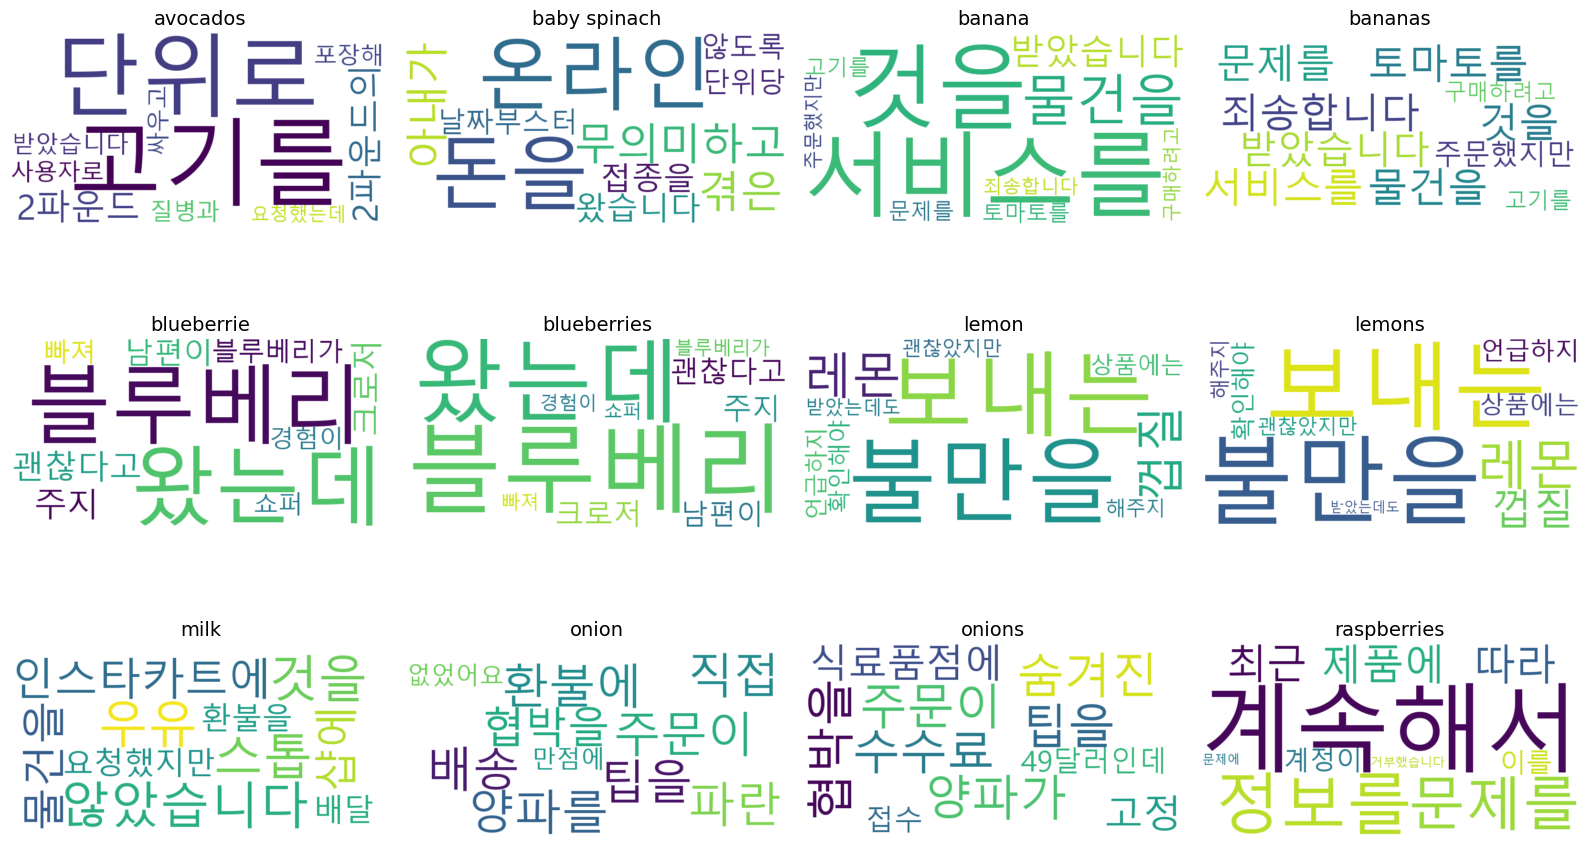

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 시각화 설정
plt.figure(figsize=(16, 10))

# 제품별 워드클라우드 생성
for idx, row in df_tfidf_final.iterrows():
    product = row['product']
    keywords = row['tfidf_keywords']
    
    # 키워드 리스트를 공백으로 연결
    text = ' '.join(keywords)
    
    # 워드클라우드 생성
    wordcloud = WordCloud(
        font_path='malgun.ttf',  # Windows 사용자의 경우 / 맥은 적절히 교체
        background_color='white',
        width=800,
        height=400
    ).generate(text)
    
    # 그래프 표시
    plt.subplot(3, 4, idx + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(product, fontsize=14)

    if idx == 11:  # 12개까지만 시각화
        break

plt.tight_layout()
plt.show()


- 워드클라우드를 통해서 시각화하니까 더 아쉬움 

지금 할 수 있는 보완 방법: N-gram 기반 TF-IDF

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 제품별 리뷰 합치기
documents = []
product_names = []

for product in mlb.classes_:
    product_reviews = df_onehot[df_onehot[product] == 1]['review'].dropna().astype(str)
    document = ' '.join(product_reviews)
    product_names.append(product)
    documents.append(document)

# 2-gram TF-IDF 적용
vectorizer = TfidfVectorizer(
    stop_words=korean_stopwords,
    max_features=1000,
    ngram_range=(2, 2)  # 2-gram
)
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# 상위 10개 키워드 추출
tfidf_top_keywords = []
for i in range(tfidf_matrix.shape[0]):
    row = tfidf_matrix[i].toarray().flatten()
    top_indices = row.argsort()[::-1][:10]
    keywords = [feature_names[idx] for idx in top_indices]
    tfidf_top_keywords.append(keywords)

# 결과 저장
df_bigram = pd.DataFrame({
    'product': product_names,
    'tfidf_bigrams': tfidf_top_keywords
})
df_bigram.head()


,product,tfidf_bigrams
0,avocados,"[2파운드 단위로, 여러 해를, 직원들이 알버트슨스, 저울을 구입하여, 알버트슨스 ..."
1,baby spinach,"[무의미하고 비효율적이었습니다, 것을 선택했습니다, 비용이 비싼, 격리되어 왔습니다..."
2,banana,"[추가 품목이, 문제로 인해, 불만에 대한, 대한 응답이, 받았고 불만에, 2파운드..."
3,bananas,"[추가 품목이, 받았고 불만에, 문제로 인해, 불만에 대한, 대한 응답이, 구매하려..."
4,blueberrie,"[쇼퍼의 경험이, 한다고 했는데, 부족한 같았고, 제대로 받아서, 매우 무례했습니다..."


0620 

In [44]:
import pandas as pd
import re

# 예시: 'review' 컬럼이 있는 DataFrame
df['sentences'] = df['review'].apply(lambda x: re.split('[.!?]', x))  # 문장 단위 나누기
df = df.explode('sentences')  # 문장별로 나누기
df['sentences'] = df['sentences'].str.strip()  # 공백 제거
df = df[df['sentences'].str.len() > 3]  # 너무 짧은 문장 제거

In [45]:
from konlpy.tag import Okt

okt = Okt()

# 불용어 예시
stopwords = ['정말', '진짜', '너무', '거의', '그냥', '좀', '것', '거', '에서', '으로', '하게', '해서']

# 토큰화 및 불용어 제거
def clean_and_tokenize(text):
    tokens = okt.pos(text, stem=True)  # 품사 정보 포함
    cleaned = [word for word, tag in tokens 
               if tag in ['Noun', 'Verb', 'Adjective'] and word not in stopwords]
    return cleaned

df['tokens'] = df['sentences'].apply(clean_and_tokenize)


In [46]:
negative_keywords = ['느리다', '떨어지다', '찢어지다', '불편하다', '시들다', '익다', '없다', '상하다', '더럽다', '이상하다']

# 부정 키워드 포함 여부
df['is_negative'] = df['tokens'].apply(lambda tokens: any(neg in tokens for neg in negative_keywords))

# 불만 리뷰만 따로 추출
df_negative = df[df['is_negative']]


In [47]:
from collections import Counter

# 모든 불만 문장 토큰 합치기
all_tokens = df_negative['tokens'].explode()
token_counts = Counter(all_tokens)

# 상위 키워드 확인
token_counts.most_common(30)


[('하다', 58),
 ('없다', 43),
 ('주문', 20),
 ('수', 17),
 ('있다', 17),
 ('인스타', 11),
 ('카트', 11),
 ('받다', 9),
 ('가다', 8),
 ('문제', 7),
 ('되다', 7),
 ('쇼퍼', 6),
 ('사용', 6),
 ('환불', 6),
 ('우유', 6),
 ('많다', 6),
 ('가게', 6),
 ('때', 5),
 ('되어다', 5),
 ('쇼핑', 5),
 ('상품', 5),
 ('서비스', 5),
 ('요청', 4),
 ('응답', 4),
 ('제품', 4),
 ('대한', 4),
 ('대체', 4),
 ('물품', 4),
 ('말', 4),
 ('이다', 4)]

In [48]:
# 분석에 쓸 키워드만 필터링
meaningful_keywords = [
    '주문', '환불', '쇼퍼', '상품', '서비스', '요청', '응답', '대체', '물품', '제품',
    '문제', '사용', '쇼핑', '우유', '레몬', '바나나', '시금치', '딸기', '양파'
]

df_filtered = df_negative.copy()
df_filtered['filtered_tokens'] = df_filtered['tokens'].apply(
    lambda tokens: [t for t in tokens if t in meaningful_keywords]
)


리뷰 → 문장 단위 분리 → 토큰화 + 불용어 제거 → 의미 있는 키워드만 필터링 (filtered_tokens)

In [51]:
# 예: 우유, 환불 등 키워드가 포함된 문장만 추출
df_filtered['matched_keywords'] = df_filtered['filtered_tokens'].apply(lambda x: ', '.join(x))

# 키워드별로 어떤 문장이 있었는지 보기
for keyword in meaningful_keywords:
    print(f"\n🔍 {keyword.upper()} 관련 문장들")
    subset = df_filtered[df_filtered['filtered_tokens'].apply(lambda tokens: keyword in tokens)]
    for s in subset['sentences'].head(5):  # 상위 5개씩 예시 출력
        print("-", s)



🔍 주문 관련 문장들
- 10달러 할인 쿠폰을 사용했는데 두 번째 주문에는 거부당했고 환불을 받을 수 없었습니다
- 미친 듯한 문제를 집으로 가져오는 것은 상당한 문제를 야기했으며 잘못된 물건을 주문할 수 없었습니다
- 더 많은 인스타카트 팁을 요청하고 주문을 할 때 불편했습니다
- 그런데 이번에는 남자가 주문한 많은 물건들 중 일부가 없다고 표시했고, 최악의 대체품을 골랐어요
- 원래 주문한 것 대신에 치킨 팩을 받았는데, 가격이 다르고 다른 것들을 주문할 수 없다고 표시했어요

🔍 환불 관련 문장들
- 10달러 할인 쿠폰을 사용했는데 두 번째 주문에는 거부당했고 환불을 받을 수 없었습니다
- 환불 기록이 없습니다
- 인스타카트는 환불을 해주었지만, 유감스럽게도 쇼퍼들은 수수료를 받을 가치가 없다
- 마침내 환불을 받았지만 배송비와 팁을 돌려받을 수 없었어요
- 4월 18일 주문이 알 수 없는 주소로 배달되었을 때, 인스타카트 고객 서비스는 즉시 크레딧을 제공하지 않겠다고 거부했고, 환불이 은행 카드에 7~10일이 걸릴 것이라고 말했습니다

🔍 쇼퍼 관련 문장들
- 쇼퍼의 품질이 많이 떨어진 것 같습니다
- 화가 나서 쇼퍼가 쇼핑을 하러 갔다가 재고가 없어서 다른 상품을 쇼핑하러 갔다가 폰으로 인스타카트에 127달러를 썼다는 것을 알게 되었습니다
- 인스타카트는 환불을 해주었지만, 유감스럽게도 쇼퍼들은 수수료를 받을 가치가 없다
- 인스타카트를 몇 달 동안 사용해 왔는데, 쇼퍼들이 실제로 좋은 일을 하는지 확인하는 방법이 없습니다
- 쇼퍼 노트에 완전히 익은 과일을 선택하라는 표시가 무시되었고, 우유, 빵 등의 장바구니를 선택했던 아이템들은 장기간 유통기한이 있는 것을 기대했지만 쇼퍼 노트를 추가할 수 있었으면 더 좋았을 것입니다

🔍 상품 관련 문장들
- 화가 나서 쇼퍼가 쇼핑을 하러 갔다가 재고가 없어서 다른 상품을 쇼핑하러 갔다가 폰으로 인스타카트에 127달러를 썼다는 것을 알게 되었습니다
- 상품에는 상처 입은 바나나와 사용할 수 없는 레몬, 건조된

1. Keyword+Context 기반 문장 추출 + 클러스터링 (TF-IDF + KMeans)
- 비슷한 유형의 불만을 자동으로 묶는 방식
- (예: “우유가 없다”, “우유 누락”, “우유 안 옴” → 같은 클러스터)

- 핵심 아이디어:
- TF-IDF로 문장을 벡터화 → KMeans로 묶기 → 주요 키워드로 요약

- ➡ 클러스터별로 유사 문장들이 자동으로 묶이기 때문에
- ➡ → 수작업 없이 불만 유형을 그룹화하고 요약할 수 있어요.

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 1. 불만 문장 벡터화
corpus = df_filtered['sentences'].tolist()
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus)

# 2. 클러스터링
k = 5  # 불만 유형 5개로 가정
model = KMeans(n_clusters=k, random_state=42)
df_filtered['cluster'] = model.fit_predict(X)

# 3. 각 클러스터 대표 키워드 보기
import numpy as np
terms = vectorizer.get_feature_names_out()
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    print(f"\n📌 Cluster {i} 주요 키워드:")
    for ind in order_centroids[i, :10]:
        print(terms[ind], end=', ')



📌 Cluster 0 주요 키워드:
주문한, 문제를, 없다고, 주문할, 최악의, 이번에는, 그런데, 골랐어요, 일부가, 표시했고, 
📌 Cluster 1 주요 키워드:
가게에, 했지만, 가서, 없다고, 보내서, 직원은, 블루베리가, 괜찮다고, 메시지를, 화장지, 
📌 Cluster 2 주요 키워드:
없었습니다, 대한, 불만에, 받았고, 응답이, 웹사이트에도, 아무것도, 서비스, 섬유질이, 많고, 
📌 Cluster 3 주요 키워드:
주문을, 없습니다, 인스타카트, 팁을, 없었어요, 환불을, 고객, 2025년, 환불, 기록이, 
📌 Cluster 4 주요 키워드:
요청했지만, 인스타카트에, 연락했을, 샵에, 때는, 도움을, 스톱, 응답이, 갔다가, 없었습니다, 

- 클러스터링이 잘된건지 모르겠음 
: 클러스터 내부 문장들이 정말 유사한지 보기

In [56]:
for i in range(k):  # k = 클러스터 개수
    print(f"\n🟡 클러스터 {i} 대표 문장:")
    cluster_examples = df_filtered[df_filtered['cluster'] == i]['sentences'].head(5)
    for sent in cluster_examples:
        print(" -", sent)


🟡 클러스터 0 대표 문장:
 - 미친 듯한 문제를 집으로 가져오는 것은 상당한 문제를 야기했으며 잘못된 물건을 주문할 수 없었습니다
 - 그런데 이번에는 남자가 주문한 많은 물건들 중 일부가 없다고 표시했고, 최악의 대체품을 골랐어요
 - 원래 주문한 것 대신에 치킨 팩을 받았는데, 가격이 다르고 다른 것들을 주문할 수 없다고 표시했어요
 - 직원들과 관련된 부정적 문제를 자세히 언급한 리뷰였는데, 과거에 주문한 식료품이 재고가 없다고 말했습니다
 - 주문한 상품 중 하나를 제거하는 방법이 없었고 고정 소득을 받는 노인들이 예산을 지키기 어려웠습니다

🟡 클러스터 1 대표 문장:
 - 남편이 더 이상 운전을 할 수 없어 알디 가게에 가서 장을 살 수 없을 때, 선택의 여지가 없었습니다
 - 가게에 가서 쇼핑을 하고 가까운 곳에서 픽업하라고 했지만 그렇게 할 수 없다고 했습니다
 - 메시지를 보내서 괜찮다고 했지만, 블루베리가 없었습니다
 - 시간을 보내서 여러 번 가게에 가서 우유를 살 필요가 없다고 했는데도 가게에는 정확히 그 자리에 있었고, 코로나 팬데믹을 피하기 위해 사람이 많은 곳을 피하려고 취소했는데도 가게에 갔다가 쇼핑을 한 경우도 있습니다
 - 가게에 가서 물품을 확인하려고 했지만 직원은 주문한 물품이 없다고 말했습니다

🟡 클러스터 2 대표 문장:
 - 10달러 할인 쿠폰을 사용했는데 두 번째 주문에는 거부당했고 환불을 받을 수 없었습니다
 - 인스타카트 웹사이트에도 아무것도 없었습니다
 - 76kg만 받았고, 불만에 대한 응답이 없었습니다
 - 17kg만 받았고, 불만에 대한 응답이 없었습니다
 - 두 가지 물건의 사진이 다르다는 것을 믿을 수 없었습니다

🟡 클러스터 3 대표 문장:
 - 쇼퍼의 품질이 많이 떨어진 것 같습니다
 - 환불 기록이 없습니다
 - 스테이크, 우유, 치즈, 냉동 제품 등이 외부 온도에 노출되어 왔고, 뜨거운 손으로 만진 봉지에 냉동 생선이 들어 있어서 먹을 수 없었습니다
 - 더 많은 인스타카트 팁을 요청하고 주

대표 키워드 비교 (정량적 확인)

In [57]:
from collections import Counter

# 클러스터별 주요 단어 출력
for i in range(k):
    print(f"\n🧩 클러스터 {i} 주요 키워드:")
    token_list = df_filtered[df_filtered['cluster'] == i]['filtered_tokens'].explode()
    top_keywords = Counter(token_list).most_common(10)
    print(top_keywords)



🧩 클러스터 0 주요 키워드:
[('주문', 6), ('문제', 3), ('대체', 1), ('상품', 1)]

🧩 클러스터 1 주요 키워드:
[('쇼핑', 2), ('물품', 2), ('주문', 2), (nan, 1), (nan, 1), ('우유', 1)]

🧩 클러스터 2 주요 키워드:
[('주문', 2), ('응답', 2), ('문제', 2), ('서비스', 2), ('사용', 1), ('환불', 1), (nan, 1), (nan, 1), (nan, 1), ('우유', 1)]

🧩 클러스터 3 주요 키워드:
[('주문', 10), ('쇼퍼', 5), ('환불', 5), ('사용', 5), ('우유', 4), ('제품', 4), ('서비스', 3), ('문제', 2), ('물품', 2), ('상품', 2)]

🧩 클러스터 4 주요 키워드:
[('요청', 3), ('응답', 2), ('쇼핑', 2), ('상품', 2), ('대체', 2), ('쇼퍼', 1)]


| 클러스터 | 주요 주제 추정                 | 문장 유사도 | 키워드 일치도 | 평가       |
| ---- | ------------------------ | ------ | ------- | -------- |
| 0번   | **주문 실패 & 대체품 불만**       | 유사     | 명확      | 👍 좋음    |
| 1번   | **매장 직접 방문, 픽업 어려움**     | 약간 분산됨 | 약함      | ⚠️ 보통    |
| 2번   | **쿠폰 거절, 응답 없음, 서비스 불만** | 유사     | 적절      | 👍 좋음    |
| 3번   | **쇼퍼 문제, 환불 누락, 주문 문제**  | 유사     | 매우 명확   | ✅ 가장 안정적 |
| 4번   | **요청했지만 응답 없음 / 대체품 문제** | 유사     | 보통      | 👍 좋음    |


클러스터 0 / 2 / 3 / 4는 명확한 주제를 공유하고 있어요.

예:

0번은 "주문 오류 및 잘못된 대체"

2번은 "응답 없음 + 서비스 문제"

3번은 "쇼퍼 이슈 + 환불"

4번은 "요청했으나 응답 없음 / 대체품 문제"

키워드들도 주제와 잘 맞물려 있어요 (주문, 응답, 환불, 대체, 쇼퍼, 서비스, 물품 등)

 클러스터 이름 직접 붙이기

In [59]:
cluster_labels = {
    0: "주문 오류 및 잘못된 대체품",
    1: "픽업/가게 방문 이슈",
    2: "쿠폰/응답 없는 서비스 불만",
    3: "쇼퍼 문제 및 환불 누락",
    4: "요청 응답 없음 및 대체 이슈"
}
df_filtered['cluster_label'] = df_filtered['cluster'].map(cluster_labels)


 클러스터별 요구사항 요약 문장 만들기 

In [60]:
demand_templates = {
    0: "정확한 상품 배송과 적절한 대체품 선택이 필요함",
    1: "매장 방문 없이 쇼핑이 가능하도록 시스템 개선 필요",
    2: "쿠폰/환불 이슈에 대해 빠른 고객 응대 체계 필요",
    3: "쇼퍼 교육 강화 및 환불 프로세스 투명화 필요",
    4: "고객 요청에 대한 신속한 응답 및 상품 대체 개선 필요"
}
df_filtered['user_demand'] = df_filtered['cluster'].map(demand_templates)


클러스터 라벨 + 요구사항 요약문장 적용 

In [62]:
# 각 클러스터별 대표 문장 3개 + 요구사항 요약 같이 보기
for i in sorted(df_filtered['cluster'].unique()):
    print(f"\n🧩 Cluster {i} - {cluster_labels[i]}")
    print(f" 요구사항 요약: {demand_templates[i]}")
    sample = df_filtered[df_filtered['cluster'] == i]['sentences'].head(3)
    for s in sample:
        print(" -", s)



🧩 Cluster 0 - 주문 오류 및 잘못된 대체품
 요구사항 요약: 정확한 상품 배송과 적절한 대체품 선택이 필요함
 - 미친 듯한 문제를 집으로 가져오는 것은 상당한 문제를 야기했으며 잘못된 물건을 주문할 수 없었습니다
 - 그런데 이번에는 남자가 주문한 많은 물건들 중 일부가 없다고 표시했고, 최악의 대체품을 골랐어요
 - 원래 주문한 것 대신에 치킨 팩을 받았는데, 가격이 다르고 다른 것들을 주문할 수 없다고 표시했어요

🧩 Cluster 1 - 픽업/가게 방문 이슈
 요구사항 요약: 매장 방문 없이 쇼핑이 가능하도록 시스템 개선 필요
 - 남편이 더 이상 운전을 할 수 없어 알디 가게에 가서 장을 살 수 없을 때, 선택의 여지가 없었습니다
 - 가게에 가서 쇼핑을 하고 가까운 곳에서 픽업하라고 했지만 그렇게 할 수 없다고 했습니다
 - 메시지를 보내서 괜찮다고 했지만, 블루베리가 없었습니다

🧩 Cluster 2 - 쿠폰/응답 없는 서비스 불만
 요구사항 요약: 쿠폰/환불 이슈에 대해 빠른 고객 응대 체계 필요
 - 10달러 할인 쿠폰을 사용했는데 두 번째 주문에는 거부당했고 환불을 받을 수 없었습니다
 - 인스타카트 웹사이트에도 아무것도 없었습니다
 - 76kg만 받았고, 불만에 대한 응답이 없었습니다

🧩 Cluster 3 - 쇼퍼 문제 및 환불 누락
 요구사항 요약: 쇼퍼 교육 강화 및 환불 프로세스 투명화 필요
 - 쇼퍼의 품질이 많이 떨어진 것 같습니다
 - 환불 기록이 없습니다
 - 스테이크, 우유, 치즈, 냉동 제품 등이 외부 온도에 노출되어 왔고, 뜨거운 손으로 만진 봉지에 냉동 생선이 들어 있어서 먹을 수 없었습니다

🧩 Cluster 4 - 요청 응답 없음 및 대체 이슈
 요구사항 요약: 고객 요청에 대한 신속한 응답 및 상품 대체 개선 필요
 - 스톱 앤 샵에 도움을 요청했지만, 인스타카트에 연락했을 때는 응답이 없었습니다
 - 화가 나서 쇼퍼가 쇼핑을 하러 갔다가 재고가 없어서 다른 상품을 쇼핑하러 갔다가 폰으로 인스타카트에 

| 단계                     | 내용                           |
| ---------------------- | ---------------------------- |
| 1. 리뷰 전처리              | 문장 분리, 불용어 제거, 의미 있는 키워드 필터링 |
| 2. 불만 문장 필터링           | 부정 키워드 기반으로 감정 분석            |
| 3. TF-IDF 벡터화 + KMeans | 요구사항 클러스터 자동 분류              |
| 4. 클러스터 점검             | 대표 문장, 주요 키워드, 의미 통일성 확인     |
| 5. 요구사항 요약문 작성         | 각 클러스터에 요약문장 부여              |
| 6. 요구사항 요약표 정리         | 추후 PPT/보고서용 분석 표 완성          |


In [108]:
# 클러스터링된 리뷰 데이터를 CSV로 저장
df_filtered.to_csv("clustered_reviews.csv", index=False, encoding='utf-8-sig')

In [69]:
summary_table = (
    df_filtered.groupby(['cluster', 'cluster_label', 'user_demand'])
    .size()
    .reset_index(name='문장 수')
    .sort_values(by='문장 수', ascending=False)
    .reset_index(drop=True)  # 이 줄이 핵심!
)
summary_table.style.background_gradient(cmap='Blues').set_caption("요구사항 요약표")

,cluster,cluster_label,user_demand,문장 수
0,3,쇼퍼 문제 및 환불 누락,쇼퍼 교육 강화 및 환불 프로세스 투명화 필요,19
1,2,쿠폰/응답 없는 서비스 불만,쿠폰/환불 이슈에 대해 빠른 고객 응대 체계 필요,10
2,1,픽업/가게 방문 이슈,매장 방문 없이 쇼핑이 가능하도록 시스템 개선 필요,6
3,0,주문 오류 및 잘못된 대체품,정확한 상품 배송과 적절한 대체품 선택이 필요함,5
4,4,요청 응답 없음 및 대체 이슈,고객 요청에 대한 신속한 응답 및 상품 대체 개선 필요,4


In [70]:

summary_table.head(10)  # 또는 그냥 summary_table

,cluster,cluster_label,user_demand,문장 수
0,3,쇼퍼 문제 및 환불 누락,쇼퍼 교육 강화 및 환불 프로세스 투명화 필요,19
1,2,쿠폰/응답 없는 서비스 불만,쿠폰/환불 이슈에 대해 빠른 고객 응대 체계 필요,10
2,1,픽업/가게 방문 이슈,매장 방문 없이 쇼핑이 가능하도록 시스템 개선 필요,6
3,0,주문 오류 및 잘못된 대체품,정확한 상품 배송과 적절한 대체품 선택이 필요함,5
4,4,요청 응답 없음 및 대체 이슈,고객 요청에 대한 신속한 응답 및 상품 대체 개선 필요,4


In [107]:
summary_table

,cluster,cluster_label,user_demand,문장 수
0,3,쇼퍼 문제 및 환불 누락,쇼퍼 교육 강화 및 환불 프로세스 투명화 필요,19
1,2,쿠폰/응답 없는 서비스 불만,쿠폰/환불 이슈에 대해 빠른 고객 응대 체계 필요,10
2,1,픽업/가게 방문 이슈,매장 방문 없이 쇼핑이 가능하도록 시스템 개선 필요,6
3,0,주문 오류 및 잘못된 대체품,정확한 상품 배송과 적절한 대체품 선택이 필요함,5
4,4,요청 응답 없음 및 대체 이슈,고객 요청에 대한 신속한 응답 및 상품 대체 개선 필요,4


클러스터별로 filtered_tokens 안에 있는 키워드를 모아서, 클러스터별 워드클라우드를 생성

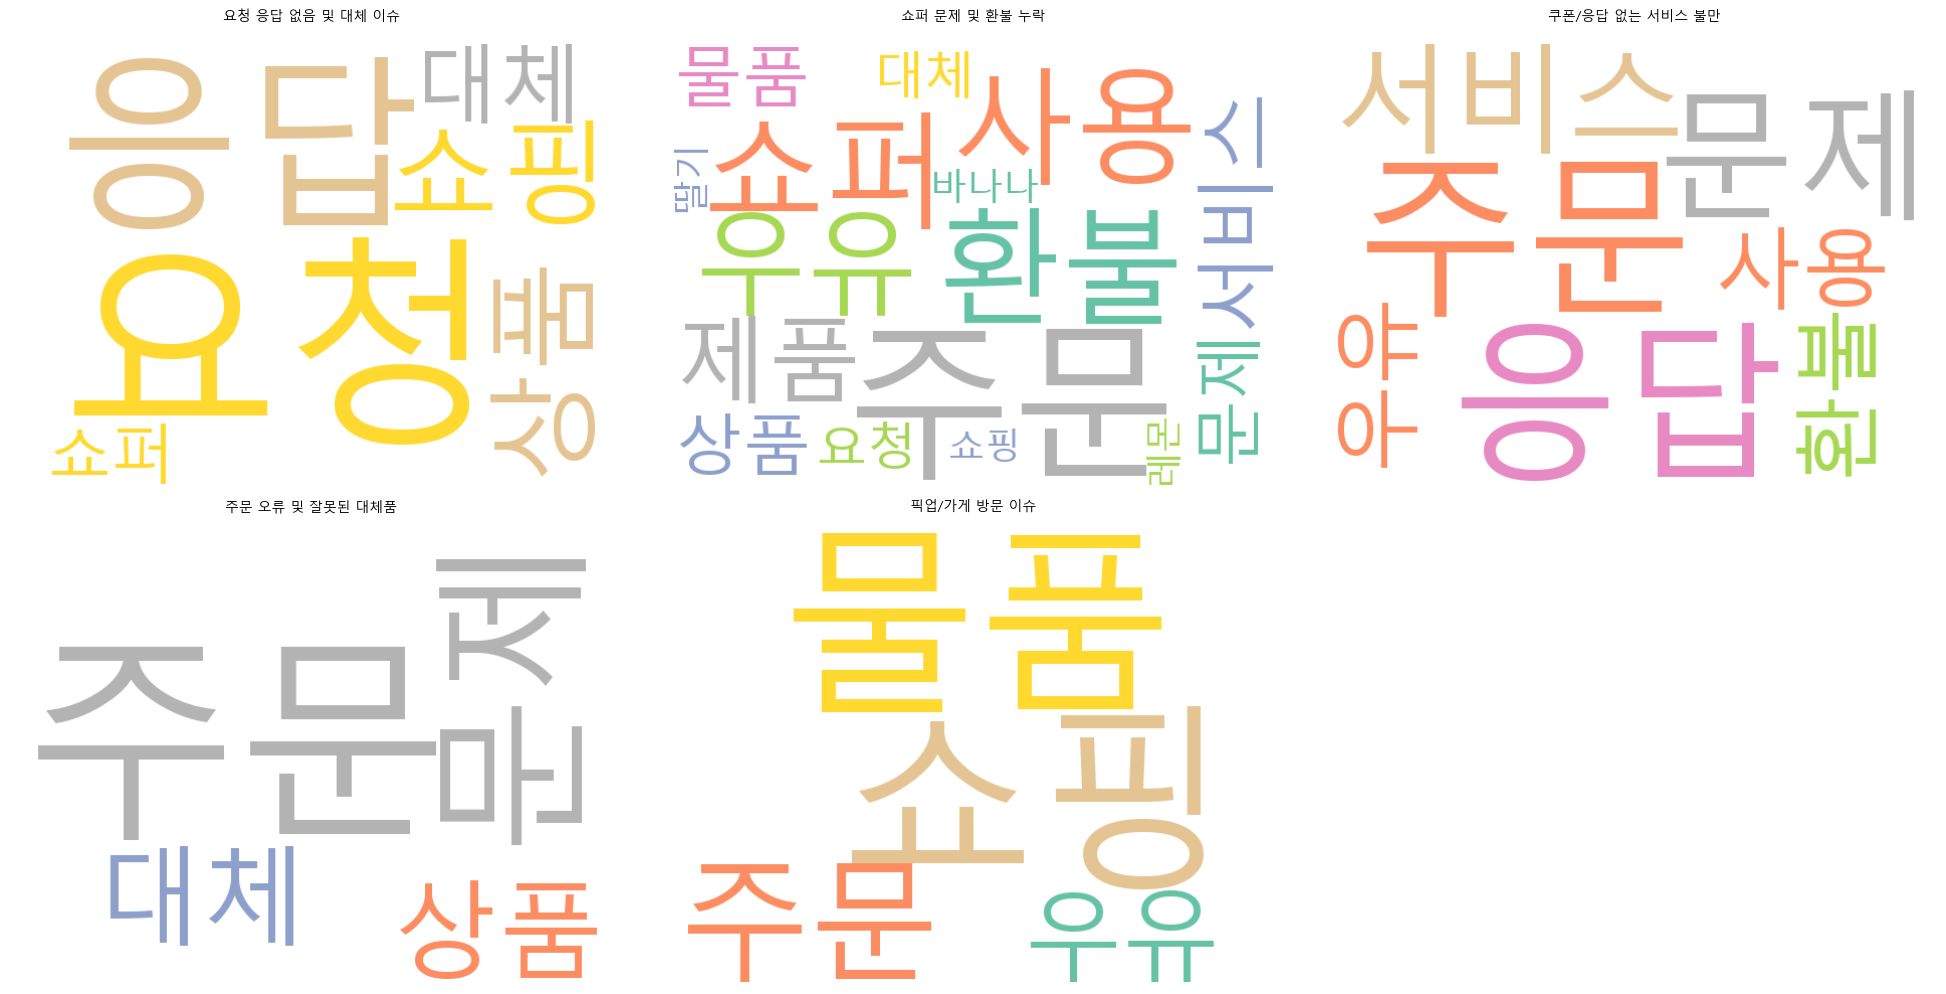

In [86]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict, Counter
import matplotlib.font_manager as fm

# ✅ 한글 폰트 경로 (운영체제에 따라 경로 다를 수 있음)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 필요 시 malgun.ttf 등으로 수정
font_prop = fm.FontProperties(fname=font_path)

# ✅ 클러스터별 키워드 모으기
cluster_keywords = defaultdict(list)

for _, row in df_filtered.iterrows():
    label = row['cluster_label']  # 또는 row['cluster'] 사용 가능
    cluster_keywords[label].extend(row['filtered_tokens'])

# ✅ 클러스터 수 기반 subplot 구성
num_clusters = len(cluster_keywords)
cols = 3
rows = (num_clusters + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()

# ✅ 워드클라우드 그리기
for idx, (label, tokens) in enumerate(cluster_keywords.items()):
    word_freq = Counter(tokens)
    wordcloud = WordCloud(
        font_path=font_path,
        background_color='white',
        colormap = 'Set2',#'tab10', #'Dark2'
        width=600,
        height=450,
        max_words=50
    ).generate_from_frequencies(word_freq)

    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis("off")
    axes[idx].set_title(
    label,
    fontsize=16,
    fontproperties=font_prop,
    pad=15
    )
    # ❗️제목에 폰트 직접 적용 (한글 깨짐 방지)
    axes[idx].set_title(
    label,
    fontsize=30,                # ⬅️ 제목 크기 키움
    fontproperties=font_prop,
    pad=15                      # ⬅️ 제목과 워드클라우드 간격 확보
)
# ✅ 남는 빈 칸 subplot 제거
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


대시보드용 사용자 요구사항 추이 시각화

C:\Users\User\AppData\Local\Temp\ipykernel_16184\1212930494.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()


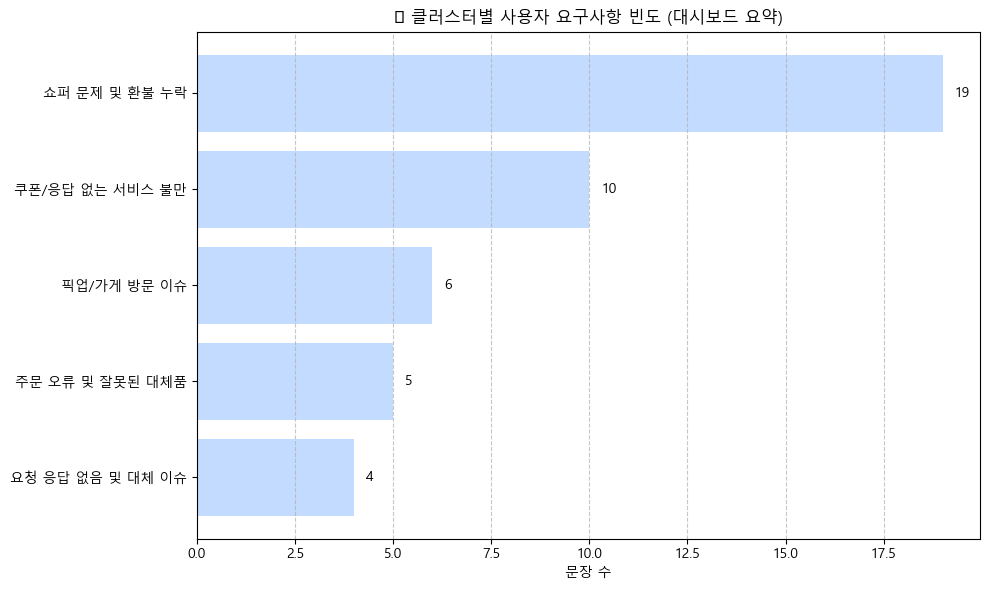

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 AppleGothic, NanumGothic 등

plt.figure(figsize=(10, 6))
bars = plt.barh(summary_table['cluster_label'], summary_table['문장 수'], color="#FFA07A")
plt.xlabel("문장 수")
plt.title("📊 클러스터별 사용자 요구사항 빈도 (대시보드 요약)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width()}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [99]:
from collections import Counter
import pandas as pd

# 👉 사전 작업: cluster_keywords 딕셔너리가 있어야 함!
# cluster_keywords = defaultdict(list)
# for _, row in df_filtered.iterrows():
#     cluster_keywords[row['cluster_label']].extend(row['filtered_tokens'])

# 클러스터별 핵심 키워드 TOP 5 추출
top_keywords_per_cluster = []

for label, tokens in cluster_keywords.items():
    counter = Counter(tokens)
    top_keywords = counter.most_common(5)
    for keyword, count in top_keywords:
        top_keywords_per_cluster.append({
            '클러스터': label,
            '키워드': keyword,
            '등장 횟수': count
        })

# ✅ 최종 데이터프레임 생성
df_top_keywords = pd.DataFrame(top_keywords_per_cluster)
df_top_keywords


,클러스터,키워드,등장 횟수
0,요청 응답 없음 및 대체 이슈,요청,3
1,요청 응답 없음 및 대체 이슈,응답,2
2,요청 응답 없음 및 대체 이슈,쇼핑,2
3,요청 응답 없음 및 대체 이슈,상품,2
4,요청 응답 없음 및 대체 이슈,대체,2
5,쇼퍼 문제 및 환불 누락,주문,10
6,쇼퍼 문제 및 환불 누락,쇼퍼,5
7,쇼퍼 문제 및 환불 누락,환불,5
8,쇼퍼 문제 및 환불 누락,사용,5
9,쇼퍼 문제 및 환불 누락,우유,4


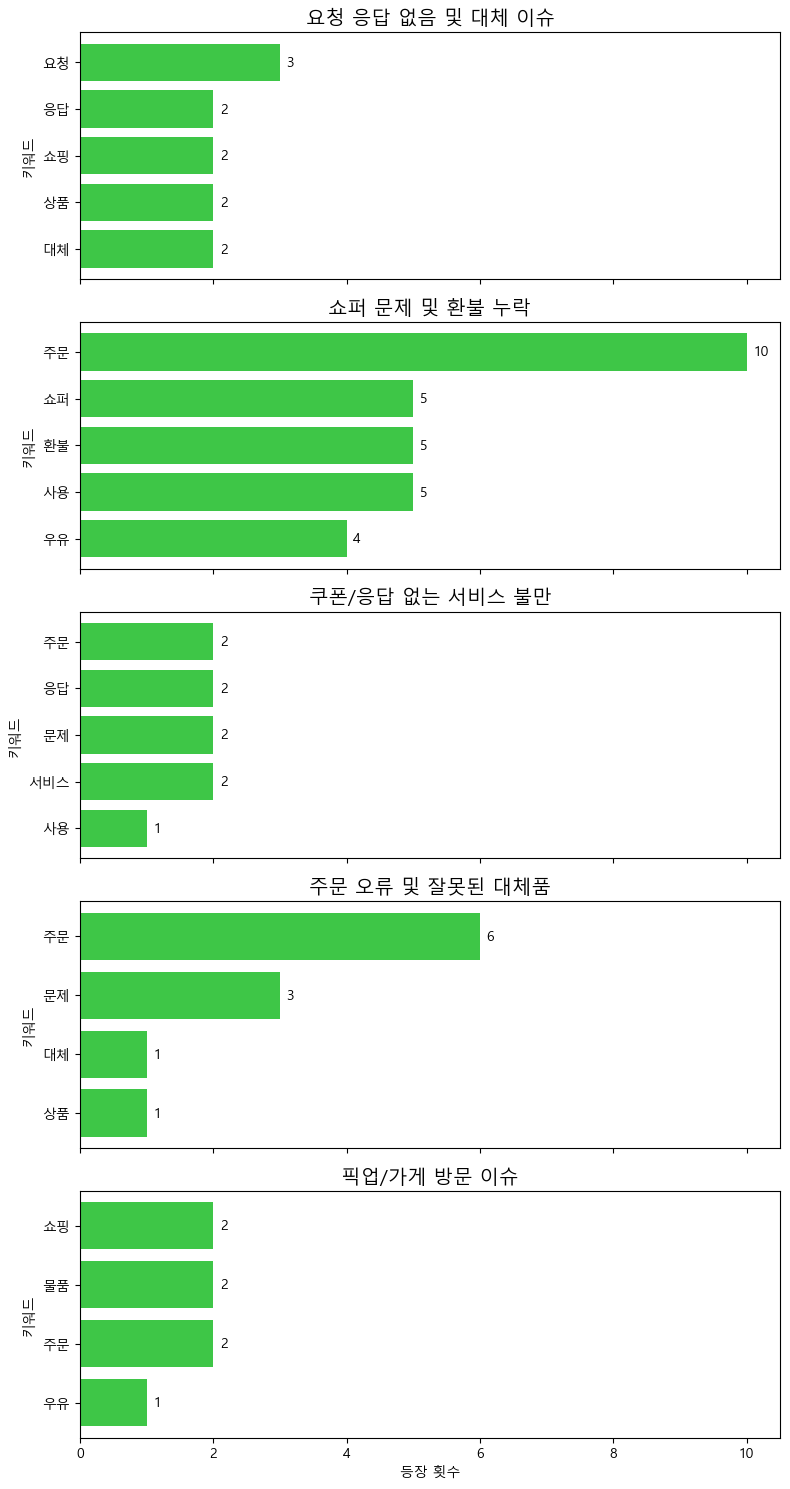

In [106]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows용)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 클러스터별로 개별 subplot 구성
clusters = df_top_keywords['클러스터'].unique()
num_clusters = len(clusters)

fig, axes = plt.subplots(num_clusters, 1, figsize=(8, 3 * num_clusters), sharex=True)

if num_clusters == 1:
    axes = [axes]

for i, cluster in enumerate(clusters):
    data = df_top_keywords[df_top_keywords['클러스터'] == cluster]
    bars = axes[i].barh(data['키워드'], data['등장 횟수'], color="#3EC647")
    axes[i].set_title(f"{cluster}", fontproperties=font_prop, fontsize=14)
    axes[i].set_ylabel("키워드", fontproperties=font_prop)
    axes[i].invert_yaxis()

    # ✅ 숫자 라벨 추가 (각 bar에 대해)
    for bar in bars:
        width = bar.get_width()
        axes[i].text(
            width + 0.1 ,  # 막대 오른쪽에 여유 있게
            bar.get_y() + bar.get_height() / 2,
            f"{int(width)}",
            va='center',
            fontsize=10,
            color='black'
        )

# 마지막 x축 레이블만 추가
axes[-1].set_xlabel("등장 횟수", fontproperties=font_prop)

plt.tight_layout()
plt.show()


In [109]:
from collections import defaultdict, Counter

# Top 10 상품 리스트 (예시)
top10_products = ['우유', '레몬', '바나나', '시금치', '딸기', '양파', '쇼퍼', '환불', '서비스', '주문']  # 실데이터에 맞게 수정하세요

# 상품별 키워드 수집
product_tokens = defaultdict(list)

for _, row in df_filtered.iterrows():
    for product in top10_products:
        if product in row['filtered_tokens']:  # 해당 문장이 이 상품에 관련된 경우
            product_tokens[product].extend(row['filtered_tokens'])


⚠️ '시금치'에 대한 토큰이 없어 워드클라우드를 건너뜁니다.
⚠️ '양파'에 대한 토큰이 없어 워드클라우드를 건너뜁니다.


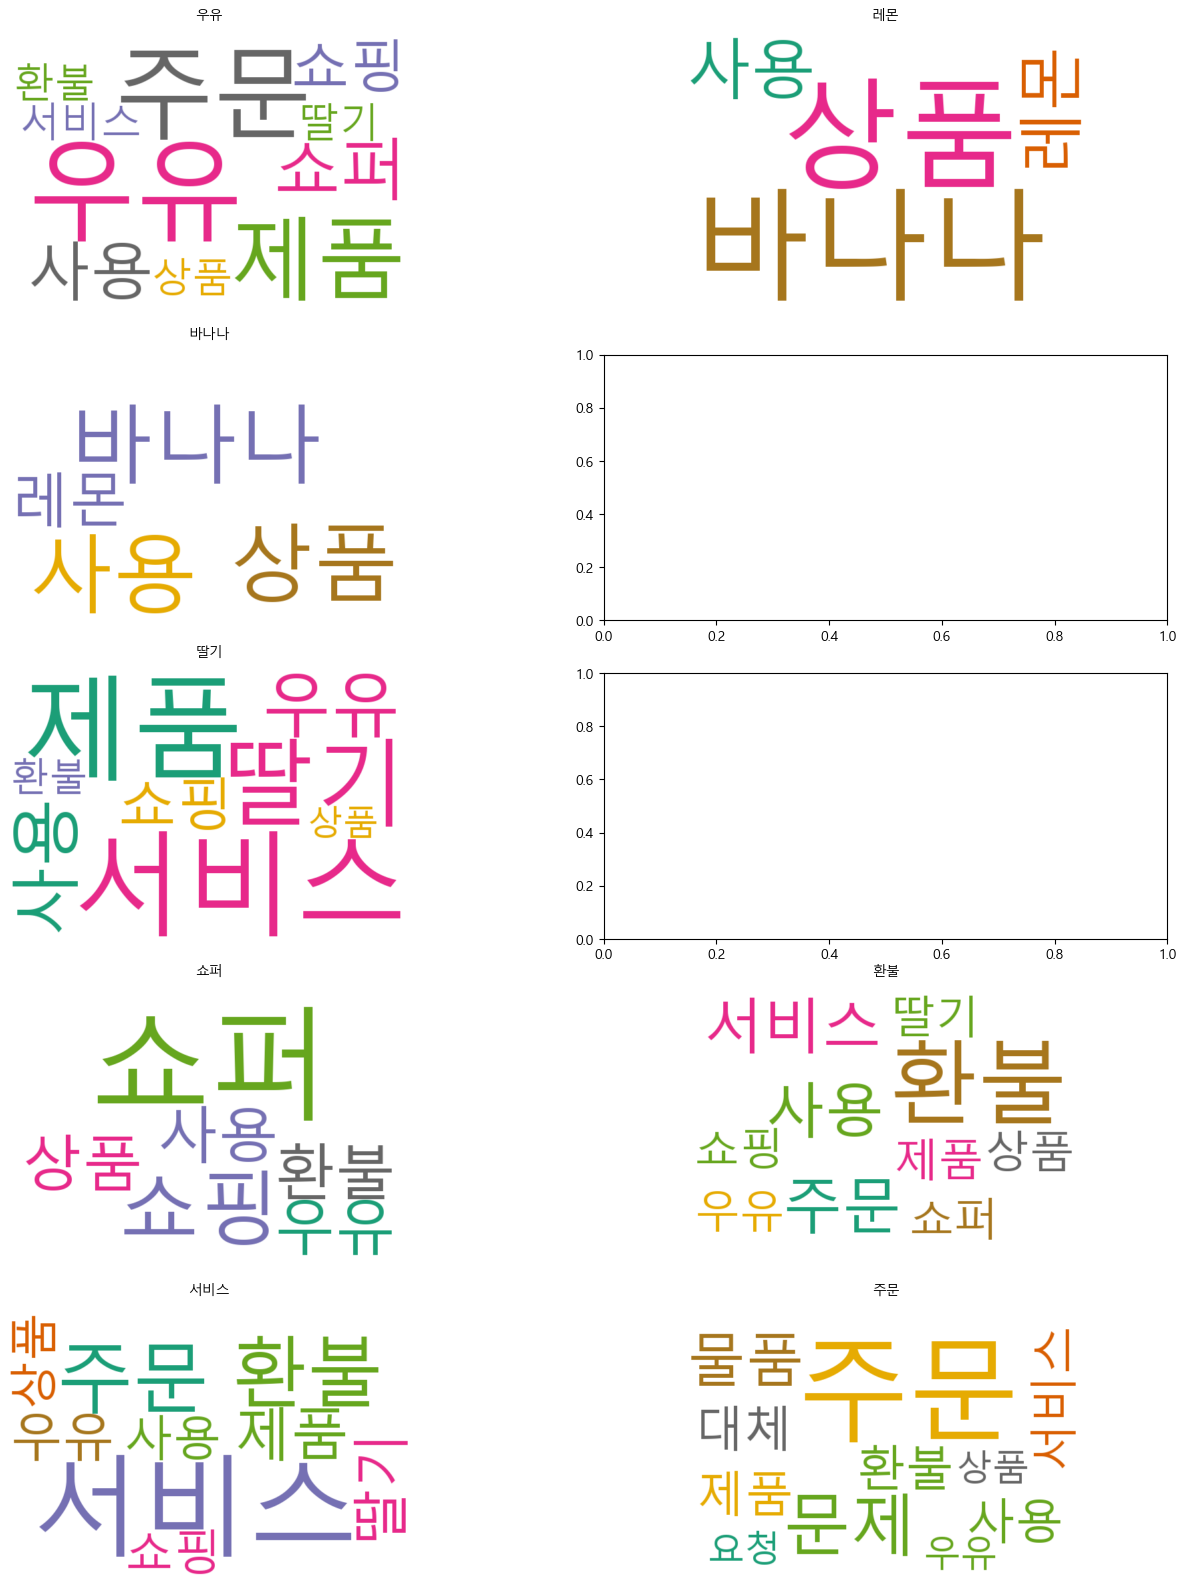

In [112]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm

font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# subplot 설정
cols = 2
rows = (len(top10_products) + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, product in enumerate(top10_products):
    tokens = product_tokens[product]
    word_freq = Counter(tokens)

    if len(word_freq) == 0:
        print(f"⚠️ '{product}'에 대한 토큰이 없어 워드클라우드를 건너뜁니다.")
        continue  # 비어 있는 경우 넘어가기

    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=600,
        height=400,
        max_words=50,
        colormap='Dark2'
    ).generate_from_frequencies(word_freq)

    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(product, fontsize=18, fontproperties=font_prop, pad=12)



- 뭔가 아쉽네

In [113]:
print(df_filtered.columns.tolist())

['rating', 'review', 'mentioned_products', 'sentences', 'tokens', 'is_negative', 'filtered_tokens', 'matched_keywords', 'cluster', 'cluster_label', 'user_demand']


In [114]:
sentence = row['review']  # 또는 row['text'], row['sentence'] 등

In [115]:
# 먼저 sentences 컬럼이 있는지 확인해서 복구
if 'sentences' not in df_filtered.columns:
    if 'review' in df_filtered.columns:
        import re
        df_filtered['sentences'] = df_filtered['review'].apply(lambda x: re.split('[.!?]', x))
        df_filtered = df_filtered.explode('sentences')
        df_filtered['sentences'] = df_filtered['sentences'].str.strip()

# 이 후에 다시 워드클라우드 + 대표문장 시각화 코드 실행하면 됩니다!


⚠️ '시금치'에 대한 토큰이 없어 워드클라우드를 건너뜁니다.
⚠️ '양파'에 대한 토큰이 없어 워드클라우드를 건너뜁니다.


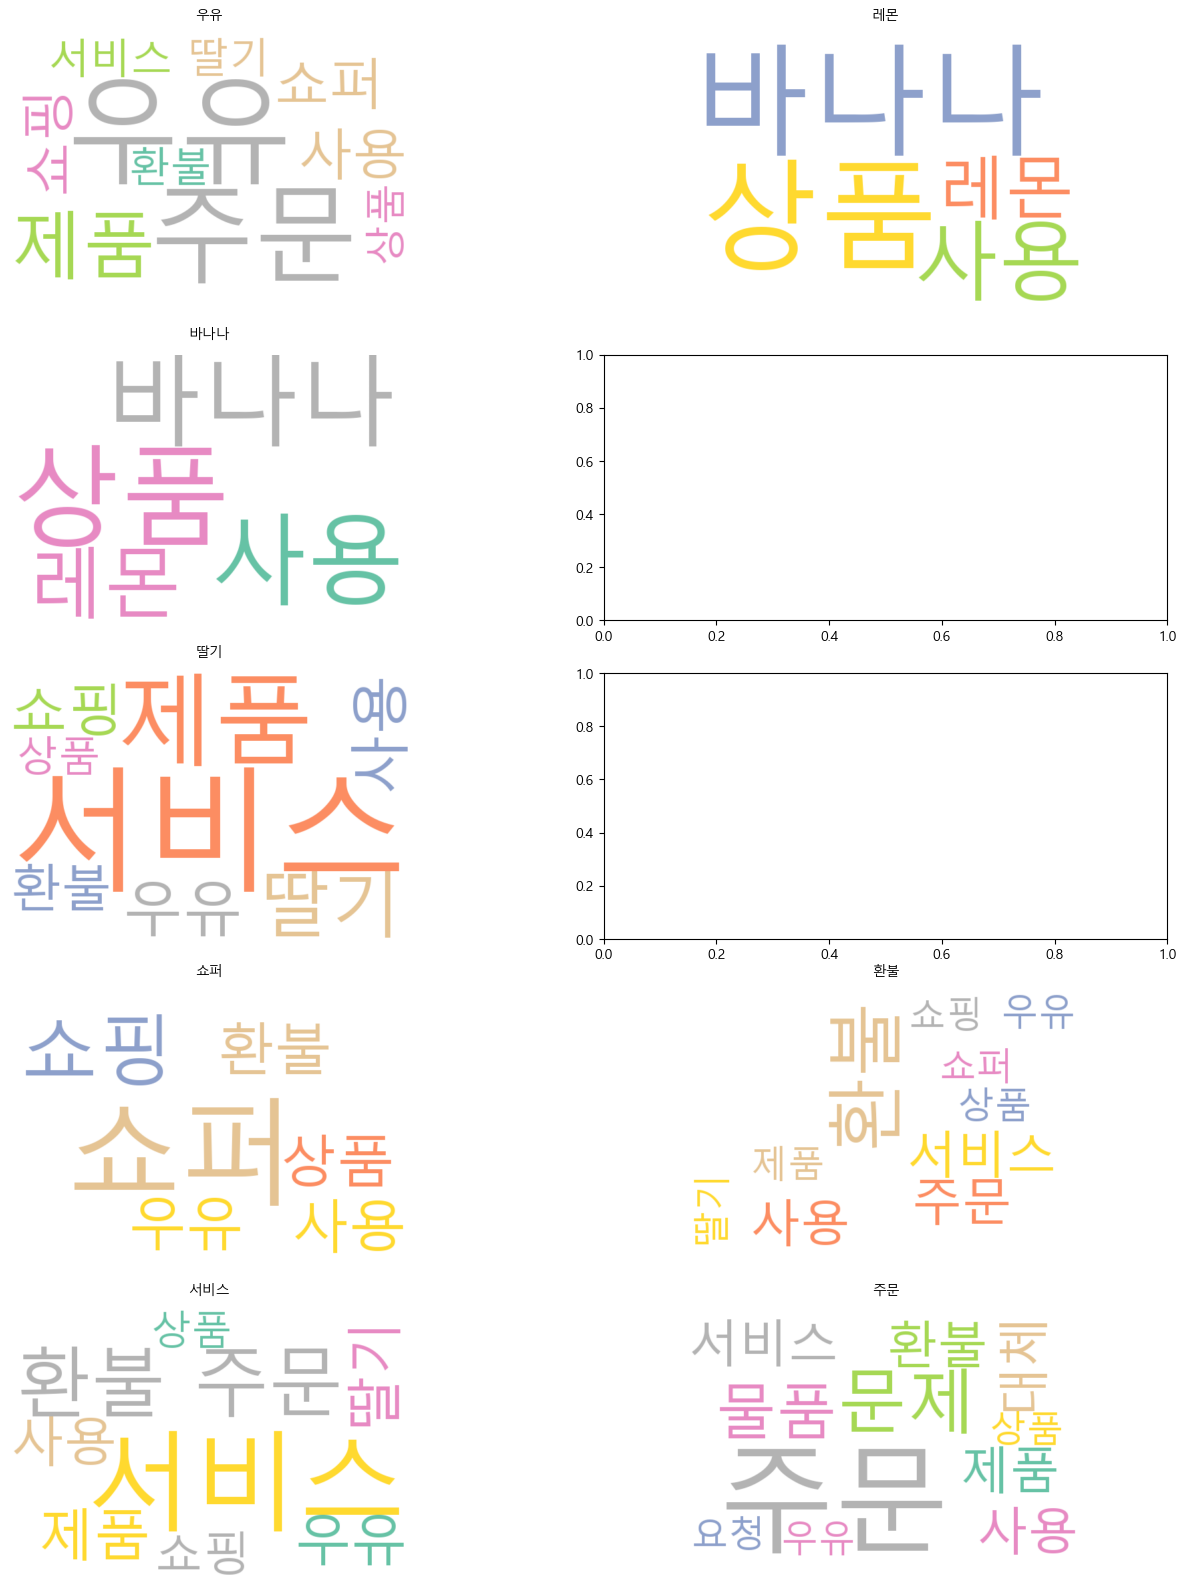

In [118]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm

font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# subplot 설정
cols = 2
rows = (len(top10_products) + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, product in enumerate(top10_products):
    tokens = product_tokens[product]
    word_freq = Counter(tokens)

    if len(word_freq) == 0:
        print(f"⚠️ '{product}'에 대한 토큰이 없어 워드클라우드를 건너뜁니다.")
        continue  # 비어 있는 경우 넘어가기

    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=600,
        height=400,
        max_words=50,
        colormap='Set2'
    ).generate_from_frequencies(word_freq)

    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(product, fontsize=18, fontproperties=font_prop, pad=12)



-> 결론부터 말하자면 상품별 포장과 같은 부분에 대한 리뷰가 없음 ,,,

In [119]:
# 상품명과 부정 키워드가 동시에 들어간 문장 추출
product_issue_examples = defaultdict(list)

for _, row in df_filtered.iterrows():
    sentence = row['sentences']
    tokens = row['filtered_tokens']
    for product in top10_products:
        if product in sentence:
            for neg in negative_keywords:
                if neg in tokens:
                    product_issue_examples[product].append(sentence)
                    break  # 중복 방지


In [120]:
for product, sents in product_issue_examples.items():
    print(f"\n📦 {product} 관련 대표 문제 문장:")
    for s in sents[:3]:
        print(f" - {s}")


In [ ]:
from collections import Counter

product_problem_keywords = {}

for product in product_issue_examples:
    keywords = []
    for sentence in product_issue_examples[product]:
        tokens = okt.pos(sentence, stem=True)
        keywords.extend([word for word, tag in tokens if tag in ['Noun', 'Adjective', 'Verb']])
    
    common = Counter(keywords).most_common(10)
    product_problem_keywords[product] = common

# 예시 출력
for p, kw_list in product_problem_keywords.items():
    print(f"\n {p} 관련 자주 언급된 키워드:")
    print(kw_list)  #  여기가 print(kw) → print(kw_list) 로 바뀌어야 함


In [ ]:
for p, kw_list in product_problem_keywords.items():
    print(f"\n {p} 관련 자주 언급된 키워드:")
    for kw, count in kw_list:
        print(f" - {kw}: {count}회")


In [126]:
print("✅ 존재하는 상품 + 문제 문장 조합 수:", len(product_issue_examples))

# 어떤 상품에 몇 개씩 들어갔는지 보기
for product in top10_products:
    print(f"{product}: {len(product_issue_examples[product])} 문장")


✅ 존재하는 상품 + 문제 문장 조합 수: 0
우유: 0 문장
레몬: 0 문장
바나나: 0 문장
시금치: 0 문장
딸기: 0 문장
양파: 0 문장
쇼퍼: 0 문장
환불: 0 문장
서비스: 0 문장
주문: 0 문장


In [127]:
if product in row['filtered_tokens']:
    for neg in negative_keywords:
        if neg in row['filtered_tokens']:
            product_issue_examples[product].append(row['sentences'])
            break


In [128]:
if product in row['filtered_tokens']:
    for neg in negative_keywords:
        if neg in row['sentences']:  # 👉 문장 기반
            product_issue_examples[product].append(row['sentences'])
            break


In [129]:
for _, row in df_filtered.iterrows():
    for product in top10_products:
        if product in row['filtered_tokens']:
            for neg in negative_keywords:
                if neg in row['sentences']:  # 부정 단어가 문장 안에 있으면
                    product_issue_examples[product].append(row['sentences'])
                    break


In [130]:
for product, sents in product_issue_examples.items():
    if sents:
        print(f"\n📦 {product} 대표 문장:")
        for s in sents[:3]:
            print(" -", s)



📦 우유 대표 문장:
 - 시간을 보내서 여러 번 가게에 가서 우유를 살 필요가 없다고 했는데도 가게에는 정확히 그 자리에 있었고, 코로나 팬데믹을 피하기 위해 사람이 많은 곳을 피하려고 취소했는데도 가게에 갔다가 쇼핑을 한 경우도 있습니다

📦 쇼퍼 대표 문장:
 - 인스타카트는 환불을 해주었지만, 유감스럽게도 쇼퍼들은 수수료를 받을 가치가 없다

📦 환불 대표 문장:
 - 인스타카트는 환불을 해주었지만, 유감스럽게도 쇼퍼들은 수수료를 받을 가치가 없다

📦 주문 대표 문장:
 - 그런데 이번에는 남자가 주문한 많은 물건들 중 일부가 없다고 표시했고, 최악의 대체품을 골랐어요
 - 원래 주문한 것 대신에 치킨 팩을 받았는데, 가격이 다르고 다른 것들을 주문할 수 없다고 표시했어요
 - 직원들과 관련된 부정적 문제를 자세히 언급한 리뷰였는데, 과거에 주문한 식료품이 재고가 없다고 말했습니다


In [132]:
packaging_issues = ['포장', '상하다', '시들다', '누락', '깨지다', '터지다', '지저분하다', '흘러내리다', '곰팡이', '변색']

In [133]:
# 인기 상품명 리스트
top_products = ['Banana', 'Spinach', 'Milk', 'Avocado', 'Blueberries', 
                'Strawberries', 'Lemon', 'Raspberry', 'Onion', 'Yogurt']

# 포장/품질 관련 이슈 키워드
issue_keywords = ['포장', '상하다', '시들다', '누락', '깨지다', '곰팡이', '터지다', '더럽다', '흘러내리다', '썩다']

# 상품명-문장 매핑 초기화
product_issue_sentences = {p: [] for p in top_products}

# 필터링
for _, row in df_filtered.iterrows():
    for product in top_products:
        if product.lower() in row['sentences'].lower():  # 상품명 언급
            if any(issue in row['sentences'] for issue in issue_keywords):  # 이슈 포함
                product_issue_sentences[product].append(row['sentences'])


In [137]:
# 상품명-문장 매핑 초기화
product_issue_sentences = {p: [] for p in top_products}

# 확인용 디버그 로그도 추가
matched_count = 0

for _, row in df_filtered.iterrows():
    sentence = row['sentences']
    for product in top_products:
        if product.lower() in sentence.lower():  # 상품명이 영문으로 있을 경우만
            if any(issue in sentence for issue in issue_keywords):
                product_issue_sentences[product].append(sentence)
                matched_count += 1

print(f"🔍 포장/품질 이슈가 있는 문장 수: {matched_count}")


🔍 포장/품질 이슈가 있는 문장 수: 0


In [138]:
# 실제 출력 확인
for product, sents in product_issue_sentences.items():
    if sents:
        print(f"\n📦 {product} 대표 문장:")
        for s in sents[:3]:
            print(" -", s)


In [139]:
# 키워드 기반 탐색
for _, row in df_filtered.iterrows():
    tokens = row['filtered_tokens']
    for product in top_products:
        if product.lower() in ' '.join(tokens).lower():  # 토큰 중 상품명 일치
            if any(issue in row['sentences'] for issue in issue_keywords):
                product_issue_sentences[product].append(row['sentences'])


In [143]:
# 상품명을 한글로 재매핑 (원하는 만큼 추가 가능)
product_map = {
    "우유": ["milk", "우유"],
    "레몬": ["lemon", "레몬"],
    "바나나": ["banana", "바나나"],
    "시금치": ["spinach", "시금치"],
    "딸기": ["strawberry", "딸기"],
    "양파": ["onion", "양파"],
    "쇼퍼": ["shopper", "쇼퍼"],
    "환불": ["refund", "환불"],
    "서비스": ["service", "서비스", "응대"],
    "주문": ["order", "주문"]
}


In [144]:
product_issue_sentences = {k: [] for k in product_map.keys()}
issue_keywords = ['포장', '상하다', '문제', '찢어지다', '없다', '구멍', '파손', '흠집', '불량', '깨짐', '찌그러짐']

for _, row in df_filtered.iterrows():
    sentence = row['sentences']
    for product, synonyms in product_map.items():
        if any(s in sentence for s in synonyms):
            if any(issue in sentence for issue in issue_keywords):
                product_issue_sentences[product].append(sentence)


In [145]:
for product, sents in product_issue_sentences.items():
    if sents:
        print(f"\n📦 {product} 관련 문제 문장:")
        for s in sents[:3]:  # 대표 3문장
            print(" -", s)
    else:
        print(f"{product}: 관련 문장 없음")



📦 우유 관련 문제 문장:
 - 시간을 보내서 여러 번 가게에 가서 우유를 살 필요가 없다고 했는데도 가게에는 정확히 그 자리에 있었고, 코로나 팬데믹을 피하기 위해 사람이 많은 곳을 피하려고 취소했는데도 가게에 갔다가 쇼핑을 한 경우도 있습니다
레몬: 관련 문장 없음
바나나: 관련 문장 없음
시금치: 관련 문장 없음
딸기: 관련 문장 없음
양파: 관련 문장 없음

📦 쇼퍼 관련 문제 문장:
 - 인스타카트는 환불을 해주었지만, 유감스럽게도 쇼퍼들은 수수료를 받을 가치가 없다

📦 환불 관련 문제 문장:
 - 인스타카트는 환불을 해주었지만, 유감스럽게도 쇼퍼들은 수수료를 받을 가치가 없다
서비스: 관련 문장 없음

📦 주문 관련 문제 문장:
 - 미친 듯한 문제를 집으로 가져오는 것은 상당한 문제를 야기했으며 잘못된 물건을 주문할 수 없었습니다
 - 그런데 이번에는 남자가 주문한 많은 물건들 중 일부가 없다고 표시했고, 최악의 대체품을 골랐어요
 - 원래 주문한 것 대신에 치킨 팩을 받았는데, 가격이 다르고 다른 것들을 주문할 수 없다고 표시했어요


쇼퍼 vs 상품 vs 시스템 문제 유형 분류 분석

| 대분류       | 설명                     |
| --------- | ---------------------- |
| 📦 상품 문제  | 제품 품질, 포장, 누락 등        |
| 🛒 쇼퍼 문제  | 쇼핑대행자의 행동, 응대, 대체 미흡   |
| 💻 시스템 문제 | 주문/결제 오류, 앱 UI, 고객센터 등 |


분류 기준 정의

In [146]:
# 클러스터 이름 -> 문제 유형 매핑
issue_type_map = {
    "주문 오류 및 잘못된 대체품": "📦 상품 문제",
    "픽업/가게 방문 이슈": "💻 시스템 문제",
    "쿠폰/응답 없는 서비스 불만": "💻 시스템 문제",
    "쇼퍼 문제 및 환불 누락": "🛒 쇼퍼 문제",
    "요청 응답 없음 및 대체 이슈": "🛒 쇼퍼 문제"
}


In [148]:
import pandas as pd

# 불러오기 (이미 불러왔거나 존재하면 생략)
df = pd.read_csv(r"C:\Users\User\Desktop\프로젝트\개인\instacart_feedback\민지\clustered_reviews.csv")

# 문제 유형 부여
df['issue_type'] = df['cluster_label'].map(issue_type_map)


C:\Users\User\AppData\Local\Temp\ipykernel_16184\1767630138.py:23: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_16184\1767630138.py:23: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_16184\1767630138.py:23: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

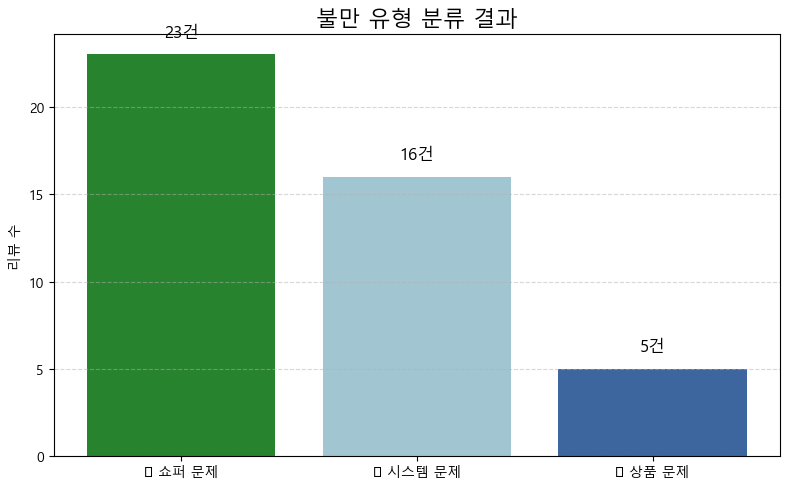

In [151]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정 (Windows 기준)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Malgun Gothic'

issue_counts = df['issue_type'].value_counts()

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(issue_counts.index, issue_counts.values, color=["#28832E", "#A1C6D2", "#3D659E"])

# 숫자 라벨
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{bar.get_height()}건", ha='center', fontsize=12)

plt.title("불만 유형 분류 결과", fontproperties=font_prop, fontsize=16)
plt.ylabel("리뷰 수", fontproperties=font_prop)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [153]:
for category in df['issue_type'].unique():
    print(f"\n {category} 대표 문장:")
    sample = df[df['issue_type'] == category]['sentences'].head(3)
    for s in sample:
        print(" -", s)



 🛒 쇼퍼 문제 대표 문장:
 - 스톱 앤 샵에 도움을 요청했지만, 인스타카트에 연락했을 때는 응답이 없었습니다
 - 쇼퍼의 품질이 많이 떨어진 것 같습니다
 - 환불 기록이 없습니다

 💻 시스템 문제 대표 문장:
 - 10달러 할인 쿠폰을 사용했는데 두 번째 주문에는 거부당했고 환불을 받을 수 없었습니다
 - 인스타카트 웹사이트에도 아무것도 없었습니다
 - 76kg만 받았고, 불만에 대한 응답이 없었습니다

 📦 상품 문제 대표 문장:
 - 미친 듯한 문제를 집으로 가져오는 것은 상당한 문제를 야기했으며 잘못된 물건을 주문할 수 없었습니다
 - 그런데 이번에는 남자가 주문한 많은 물건들 중 일부가 없다고 표시했고, 최악의 대체품을 골랐어요
 - 원래 주문한 것 대신에 치킨 팩을 받았는데, 가격이 다르고 다른 것들을 주문할 수 없다고 표시했어요


데이터가 작아서 그런지 대표문장이 비슷하게 나오네

In [156]:
from textblob import TextBlob


In [157]:
df['sentiment_score'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['label'] = df['sentiment_score'].apply(lambda x: 1 if x > 0 else 0)


In [158]:
df['배송_문제'] = df['review'].apply(lambda x: int(any(kw in x for kw in ['느리다', '늦다', '배송 안됨'])))
df['품질_문제'] = df['review'].apply(lambda x: int(any(kw in x for kw in ['상하다', '시들다', '찌그러지다'])))


 클러스터 라벨 변수화

In [161]:
# 클러스터 번호에 대응하는 라벨 이름 (요약 주제)
cluster_labels = {
    0: "주문 오류 및 잘못된 대체품",
    1: "픽업/가게 방문 이슈",
    2: "쿠폰/응답 없는 서비스 불만",
    3: "쇼퍼 문제 및 환불 누락",
    4: "요청 응답 없음 및 대체 이슈"
}

# 요약된 사용자 요구사항 (요구 포인트)
cluster_demands = {
    0: "정확한 상품 배송과 적절한 대체품 선택이 필요함",
    1: "매장 방문 없이 쇼핑이 가능하도록 시스템 개선 필요",
    2: "쿠폰/환불 이슈에 대해 빠른 고객 응대 체계 필요",
    3: "쇼퍼 교육 강화 및 환불 프로세스 투명화 필요",
    4: "고객 요청에 대한 신속한 응답 및 상품 대체 개선 필요"
}


In [162]:
# 클러스터 주제 매핑
df_filtered['cluster_label'] = df_filtered['cluster'].map(cluster_labels)

# 사용자 요구사항 매핑
df_filtered['user_demand'] = df_filtered['cluster'].map(cluster_demands)


In [159]:
df['review_length'] = df['review'].str.len()
df['num_sentences'] = df['sentences'].apply(len)
df['num_keywords'] = df['filtered_tokens'].apply(len)


In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
X_tfidf = tfidf.fit_transform(df['review'])


In [164]:
# 인덱스 초기화 (기존 인덱스 제거)
df_filtered = df_filtered.reset_index(drop=True)
df_filtered[['cluster', 'cluster_label', 'user_demand']].head()


,cluster,cluster_label,user_demand
0,4,요청 응답 없음 및 대체 이슈,고객 요청에 대한 신속한 응답 및 상품 대체 개선 필요
1,3,쇼퍼 문제 및 환불 누락,쇼퍼 교육 강화 및 환불 프로세스 투명화 필요
2,2,쿠폰/응답 없는 서비스 불만,쿠폰/환불 이슈에 대해 빠른 고객 응대 체계 필요
3,2,쿠폰/응답 없는 서비스 불만,쿠폰/환불 이슈에 대해 빠른 고객 응대 체계 필요
4,3,쇼퍼 문제 및 환불 누락,쇼퍼 교육 강화 및 환불 프로세스 투명화 필요


| 변수명             | 의미                                                       |
| --------------- | -------------------------------------------------------- |
| `cluster`       | KMeans로 클러스터링한 **숫자형 클러스터 번호** (`0, 1, 2, ...`)          |
| `cluster_label` | 해당 클러스터에 사람이 붙인 **의미 있는 이름/주제 라벨** (예: `"환불 문제"`)        |
| `user_demand`   | 클러스터에 기반해 추론한 **사용자의 요구사항 요약 문장** (예: `"환불 프로세스 개선 필요"`) |


In [168]:
df_filtered.to_csv('0621_user_damand.csv',encoding='utf-8-sig',index=False)

- 필요없네 이전에 했던거랑 같은거임 